In [1]:
%load_ext watermark


In [2]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from teeplot import teeplot as tp
from tqdm import tqdm

from pylib._seed_global_rngs import seed_global_rngs


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-05-16T09:40:17.997596+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1027-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

numpy     : 2.1.2
teeplot   : 1.4.2
matplotlib: 3.9.2
pandas    : 2.2.3
seaborn   : 0.13.2

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2025-05-14-vanilla-mut-screen"
teeplot_subdir


'2025-05-14-vanilla-mut-screen'

In [5]:
seed_global_rngs(1)


## Get Data


In [6]:
df = pd.read_parquet("https://osf.io/x2z75/download")


In [7]:
df["replicate_uuid"].nunique()


15

In [8]:
df["is_focal_mutation"] = df["mut_char_pos"] == 0


In [9]:
df["tb_stat"].unique()


['clade duration ratio', 'clade fblr ratio', 'clade growth ratio', 'clade size ratio', 'num_leaves', 'divergence_from_root', 'origin_time']
Categories (7, object): ['clade duration ratio', 'clade fblr ratio', 'clade growth ratio', 'clade size ratio', 'num_leaves', 'divergence_from_root', 'origin_time']

In [10]:
df["screen_name"].unique()


['combined_f20n50', 'combined_f20n75', 'naive50', 'naive75', 'fisher20', 'ctrl_fisher20', 'ctrl_naive75', 'covaphast_variant', 'sequence_diff']
Categories (9, object): ['combined_f20n50', 'combined_f20n75', 'naive50', 'naive75', ..., 'ctrl_fisher20', 'ctrl_naive75', 'covaphast_variant', 'sequence_diff']

In [11]:
stats = (
    "binom_p",
    "binom_stat",
    "trinom_p",
    "trinom_stat",
    "trinom_p_fill0",
    "trinom_stat_fill0",
    "mw_p",
    "cliffs_delta",
    "mw_p_dropna",
    "cliffs_delta_dropna",
)


In [12]:
records = []
groups = df[
    (df["trt_hsurf_bits"] == 0)
    & (df["trt_n_downsample"] == df["trt_n_downsample"].max())
    & (df["tb_stat"].str.contains("ratio"))
].groupby(
    [
        "trt_name",
        "replicate_uuid",
        "screen_uuid",
        "screen_min_leaves",
        "screen_name",
        "tb_stat",
    ],
    observed=True,
)
for (
    trt_name,
    replicate_uuid,
    screen_uuid,
    screen_min_leaves,
    screen_name,
    tb_stat,
), grp in tqdm(
    groups,
):
    grp_focal = grp[grp["is_focal_mutation"]].copy().reset_index(drop=True)

    record = {
        "trt_name": trt_name,
        "replicate_uuid": replicate_uuid,
        "screen_uuid": screen_uuid,
        "screen_min_leaves": screen_min_leaves,
        "screen_name": screen_name,
        "tb_stat": tb_stat,
    }

    records.append(
        {
            **record,
            **{
                stat: (
                    np.nan if len(grp_focal) == 0 else grp_focal[stat].item()
                )
                for stat in stats
            },
            **{"mutation": "focal"},
        },
    )

    try:
        grp_nonfocal = (
            grp[~grp["is_focal_mutation"]]
            .copy()
            .sample(n=200, replace=True)
            .reset_index(drop=True)
        )
        for __, row in grp_nonfocal.iterrows():
            records.append(
                {
                    **record,
                    **{stat: row[stat] for stat in stats},
                    **{"mutation": "nonfocal"},
                },
            )
    except ValueError:
        pass


100%|██████████| 1080/1080 [00:14<00:00, 76.32it/s]


In [13]:
data = pd.DataFrame(records)


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.png


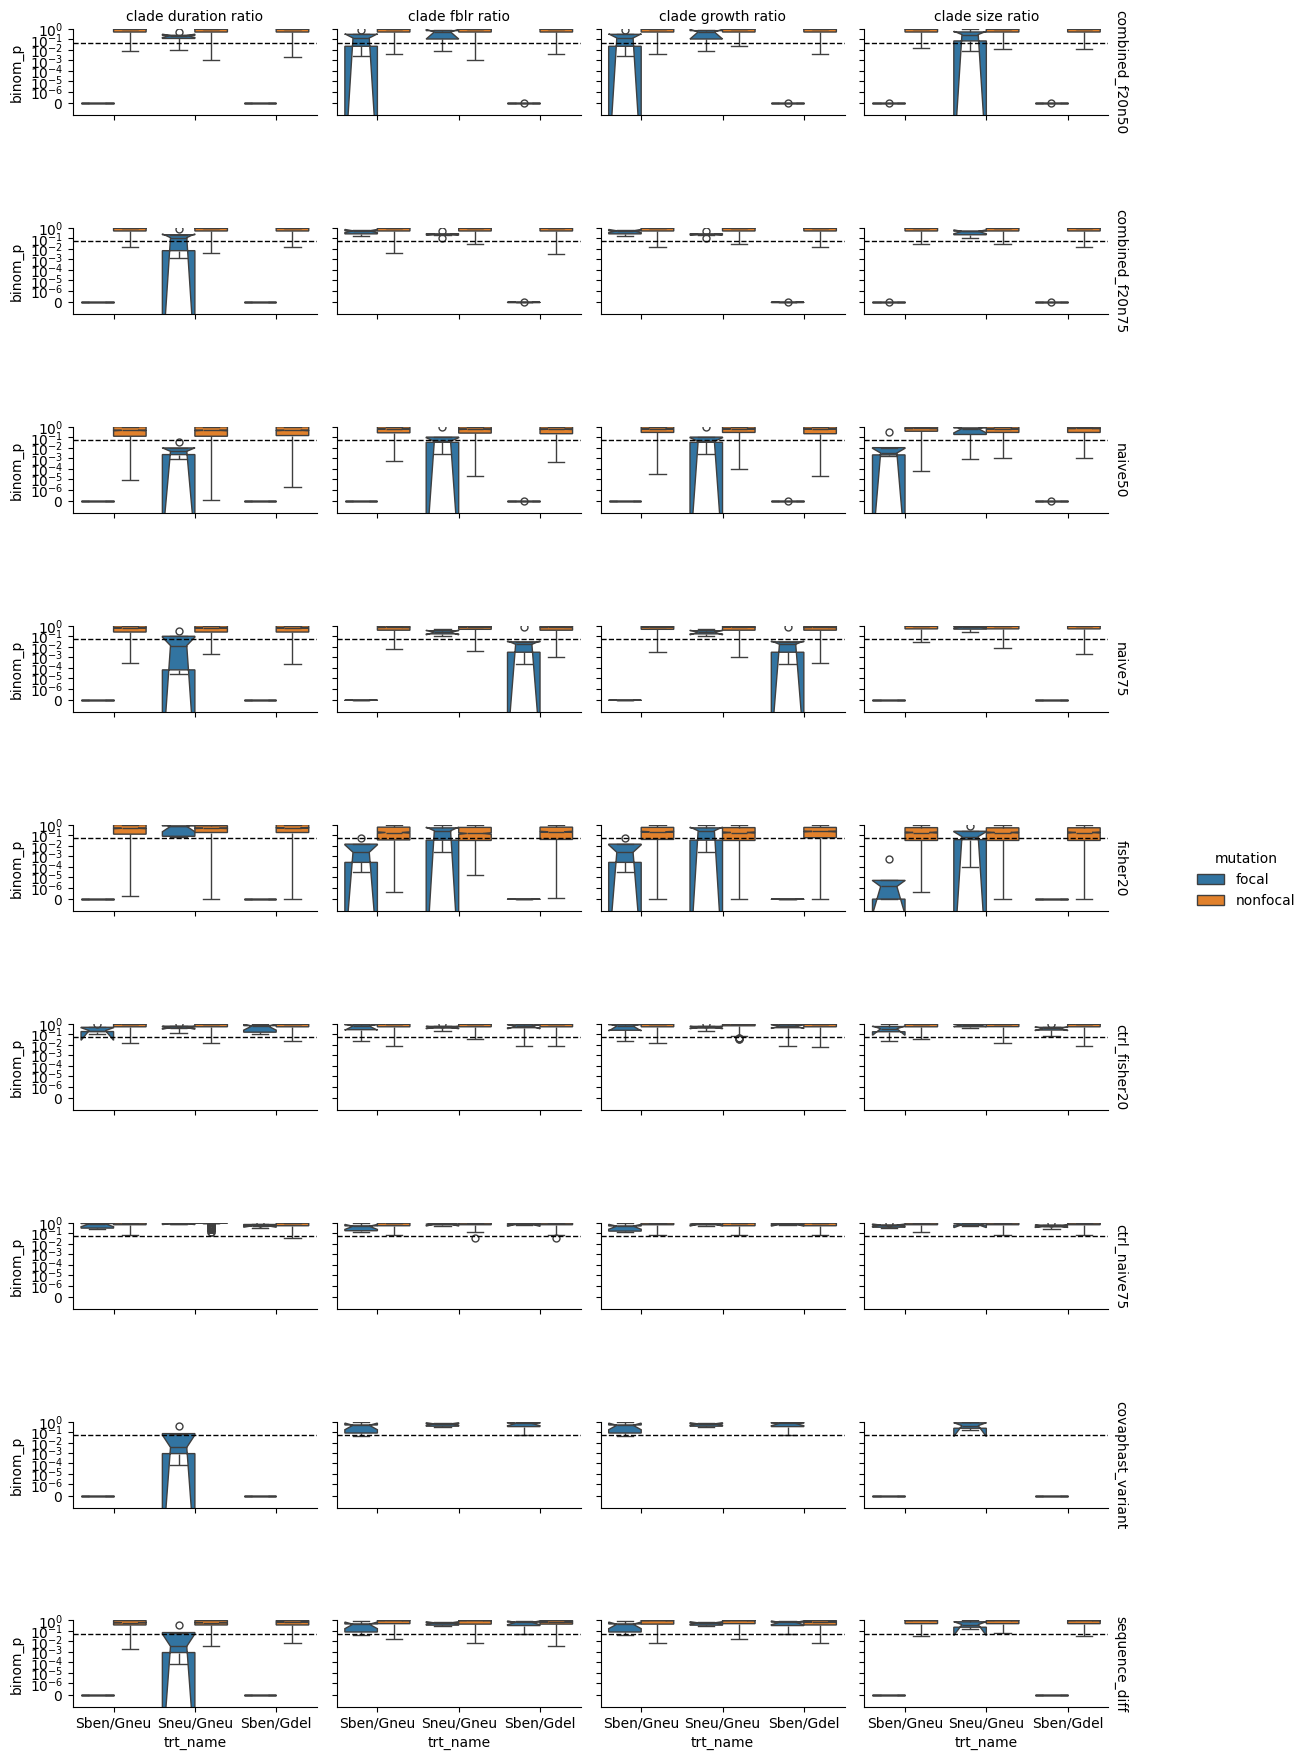

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.png


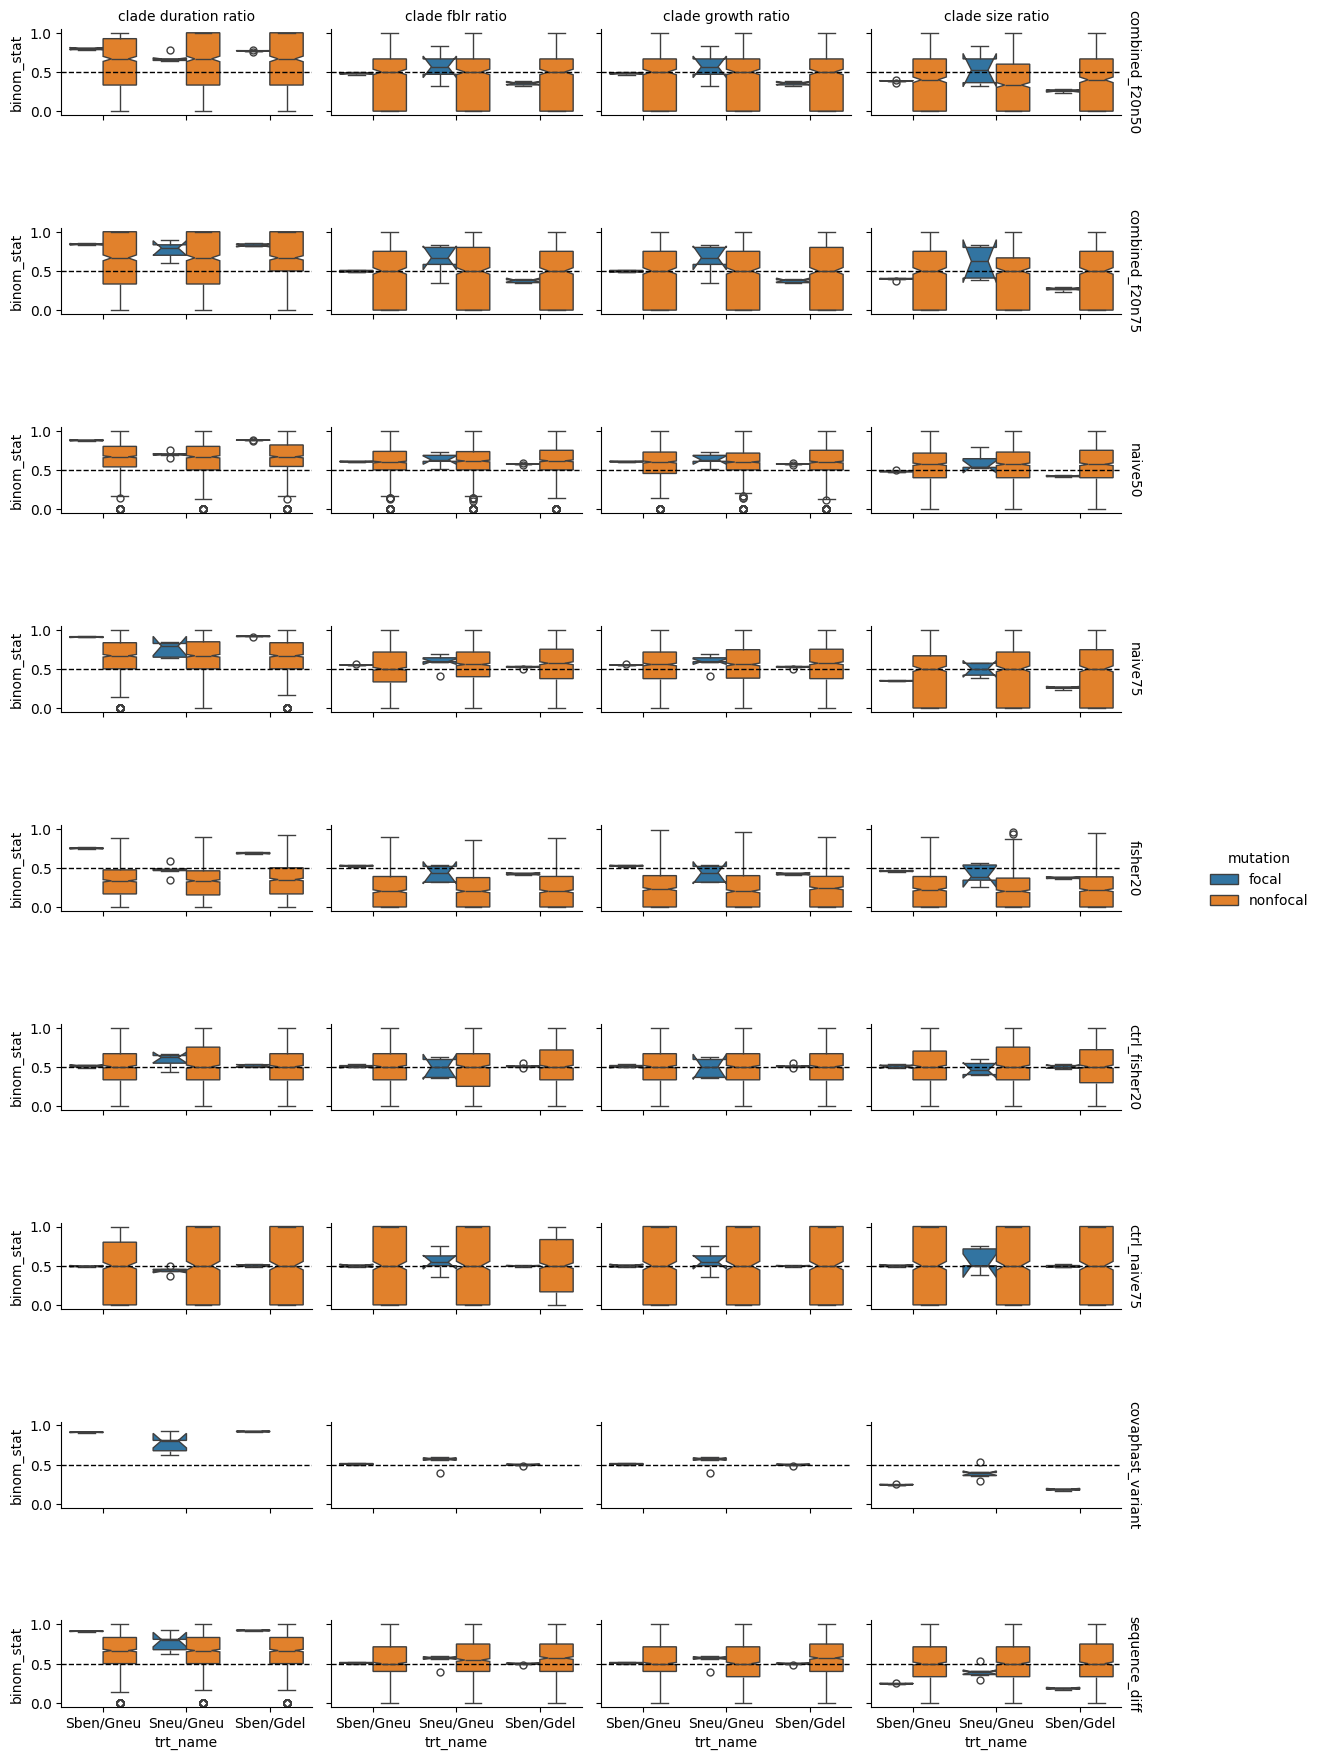

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.png


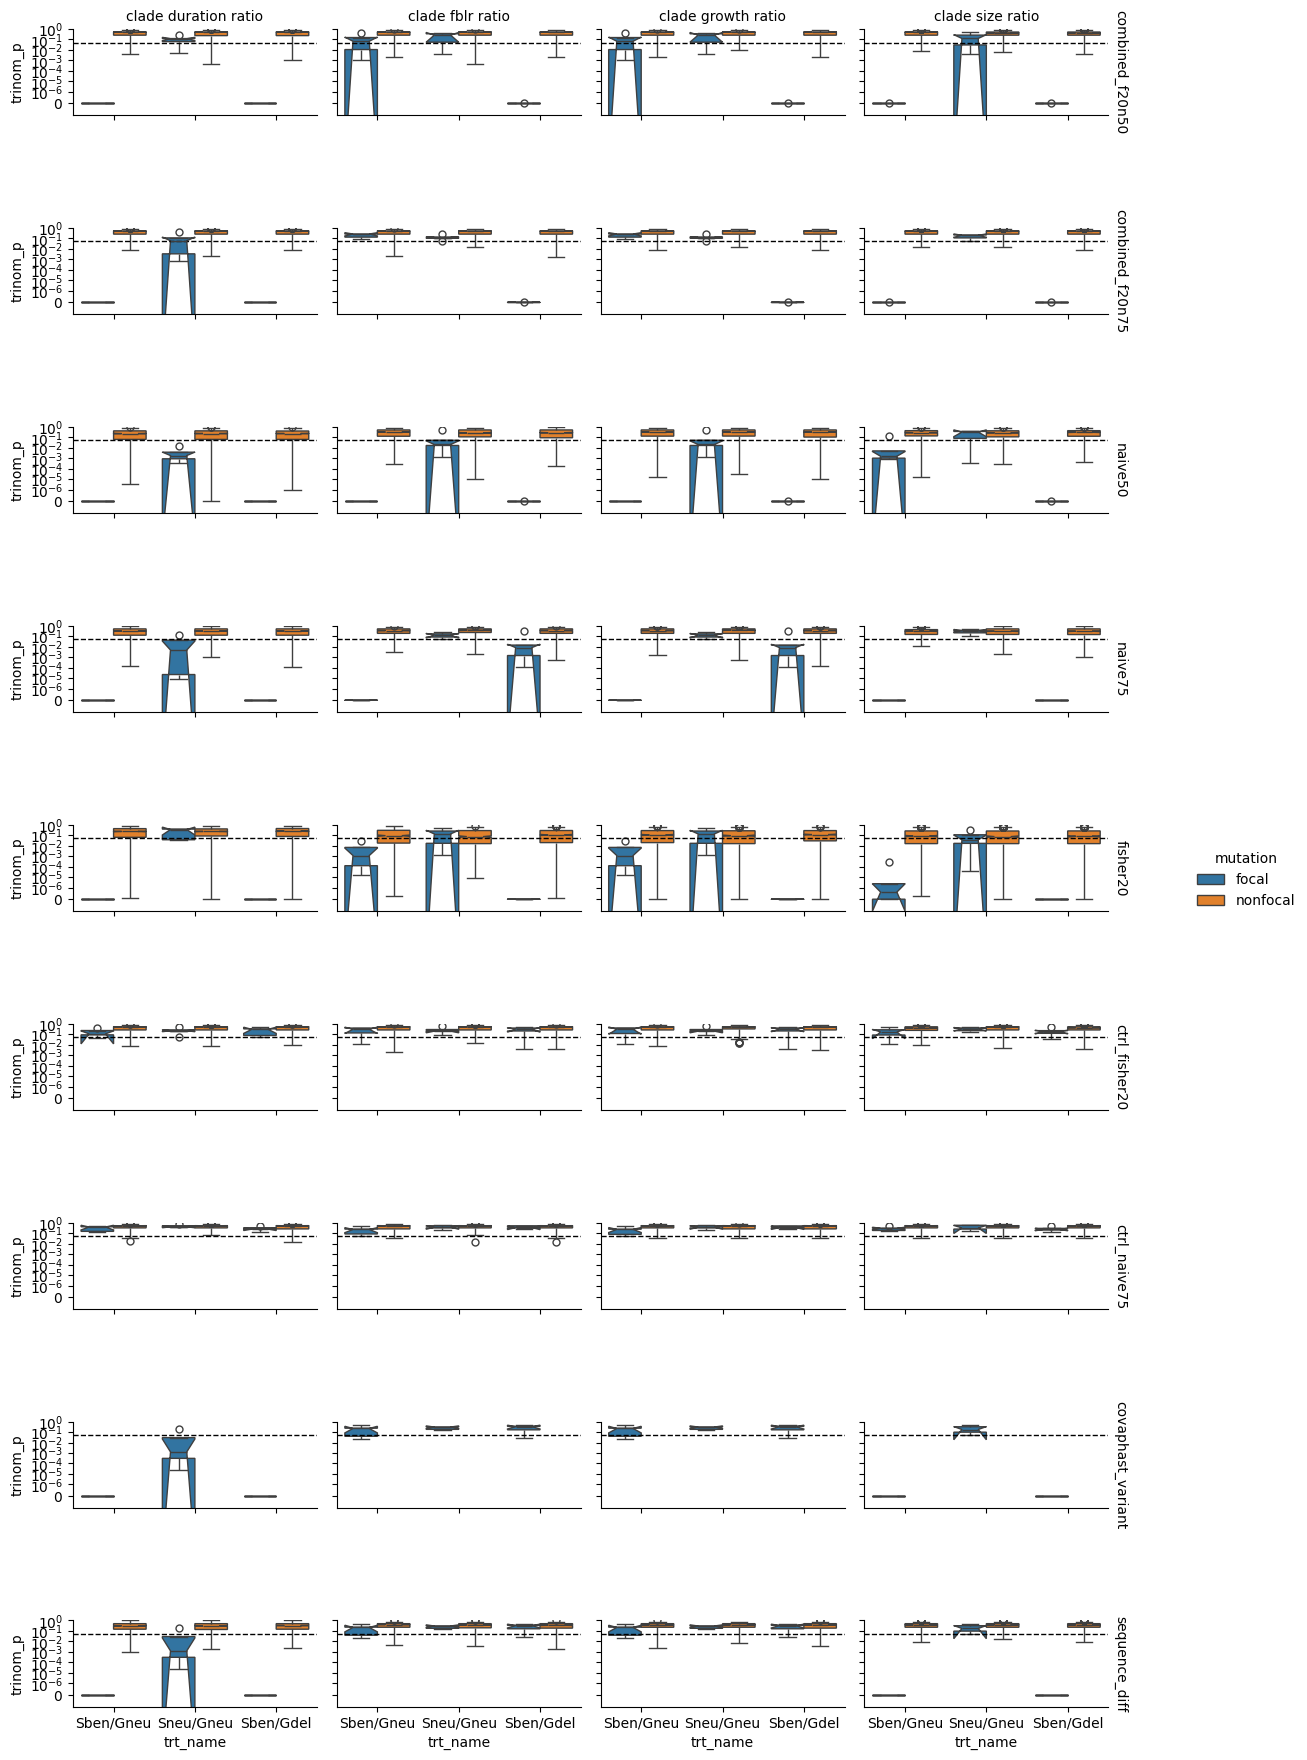

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.png


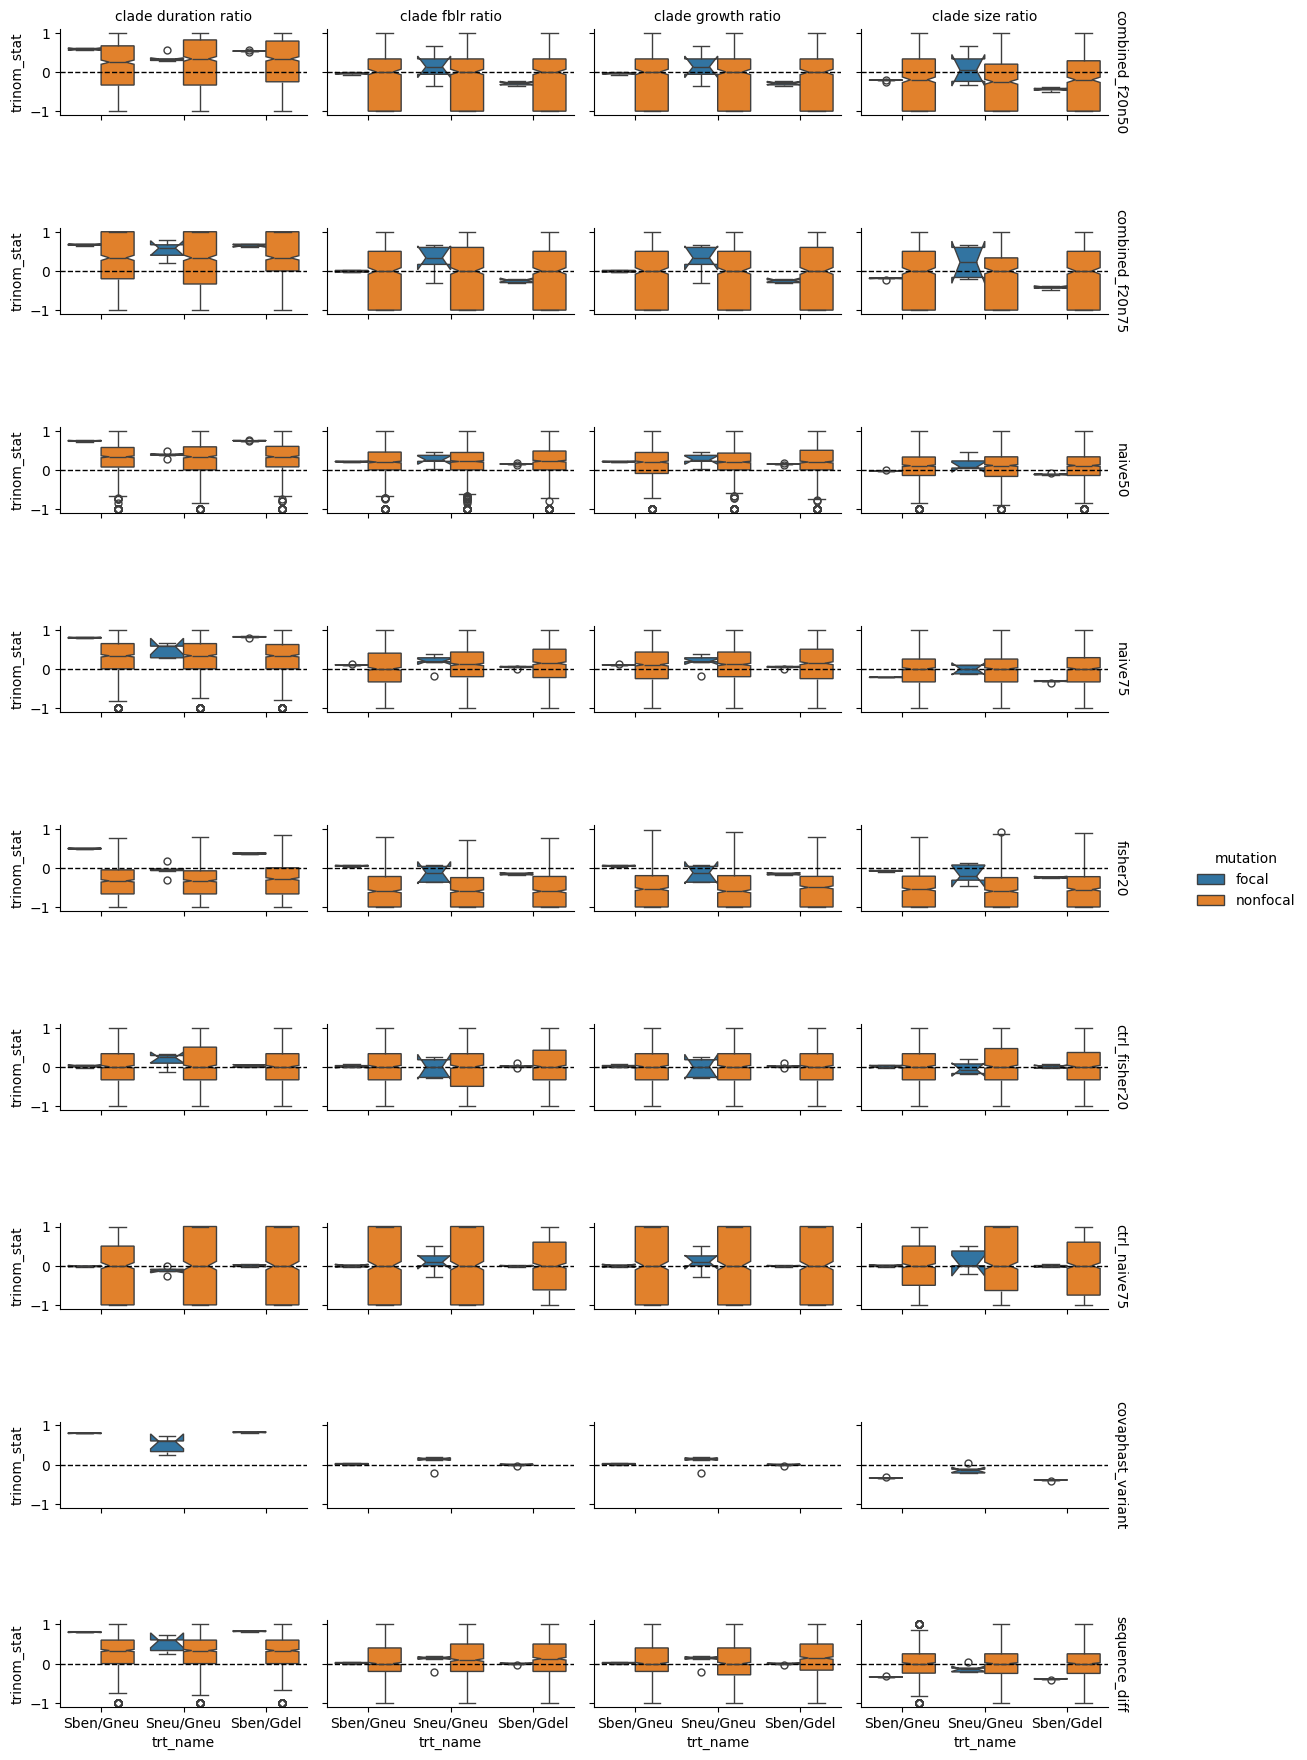

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.png


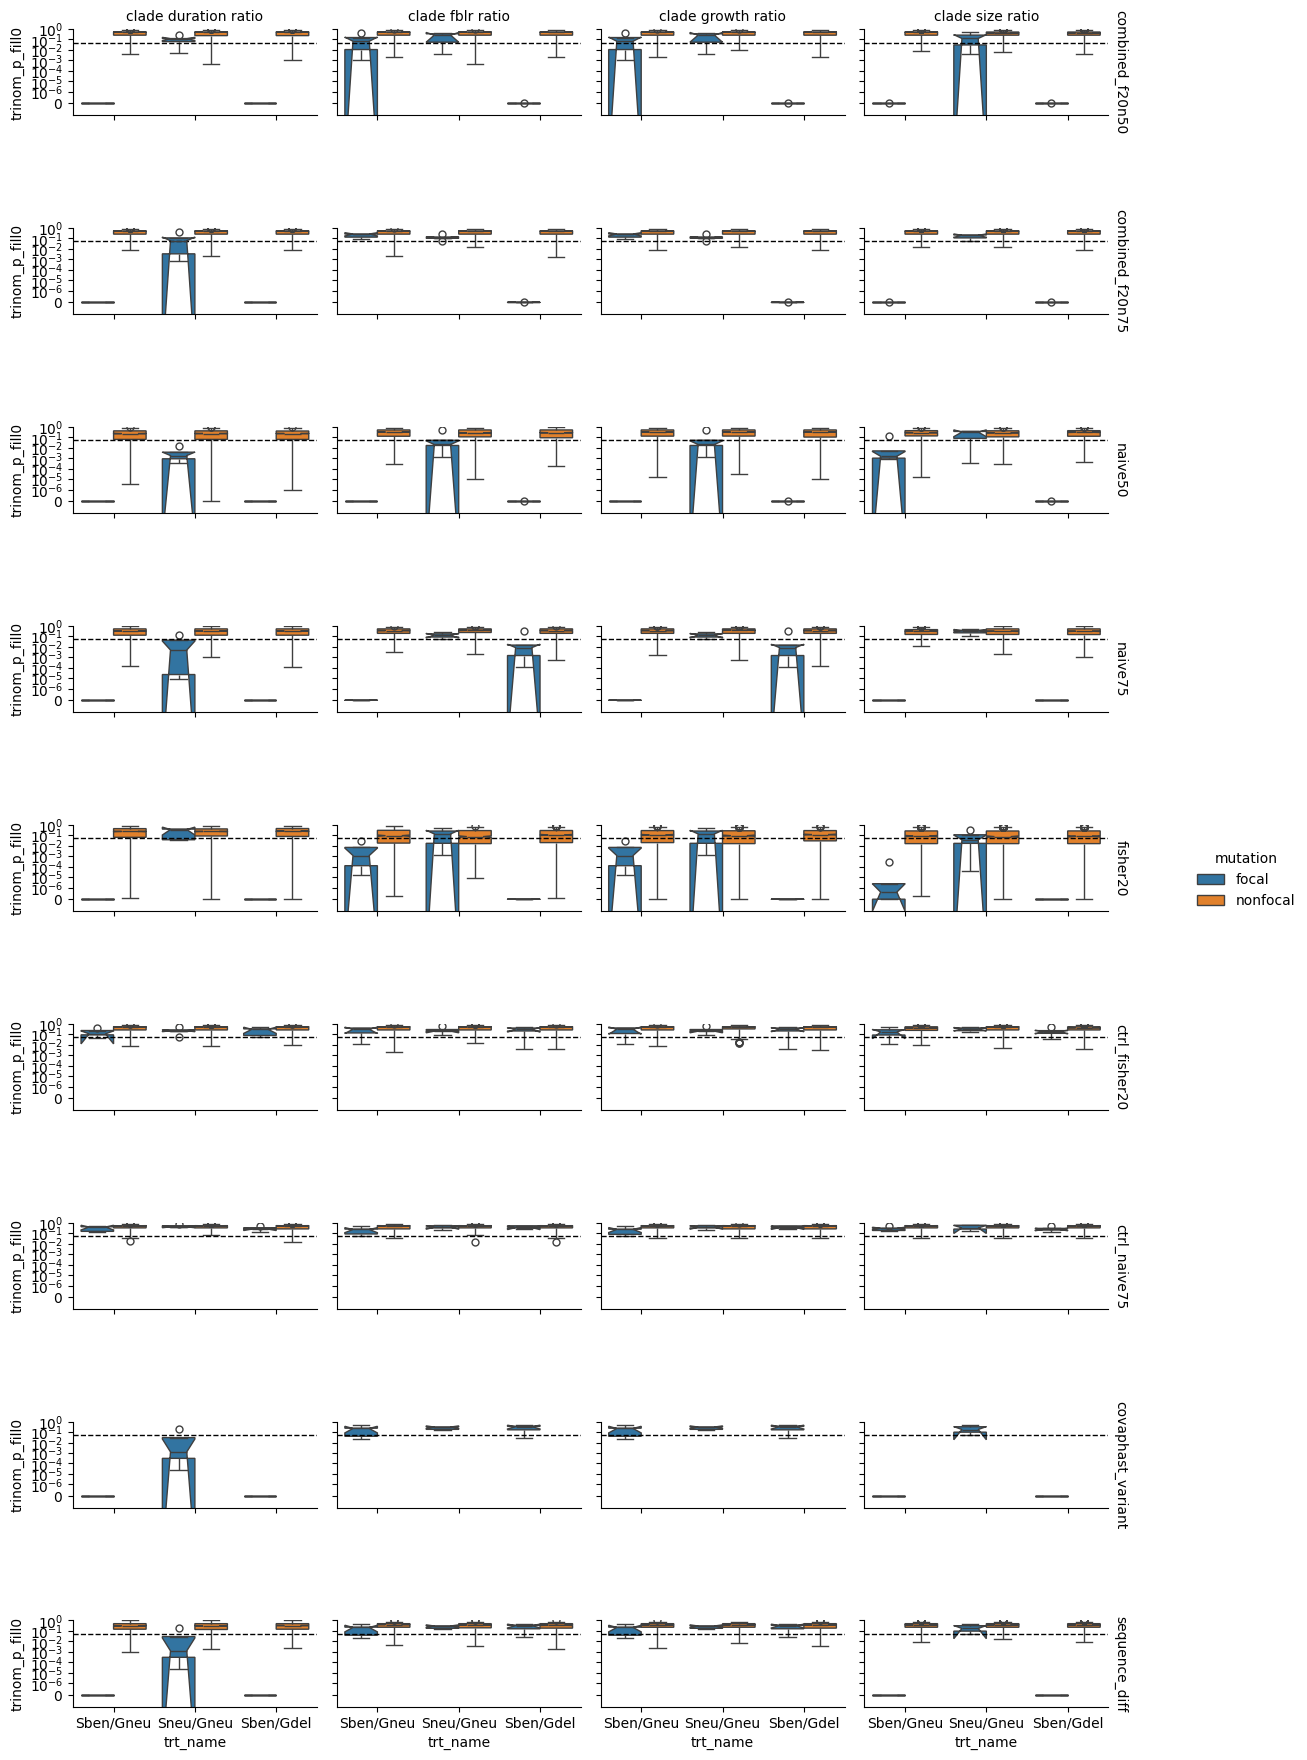

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.png


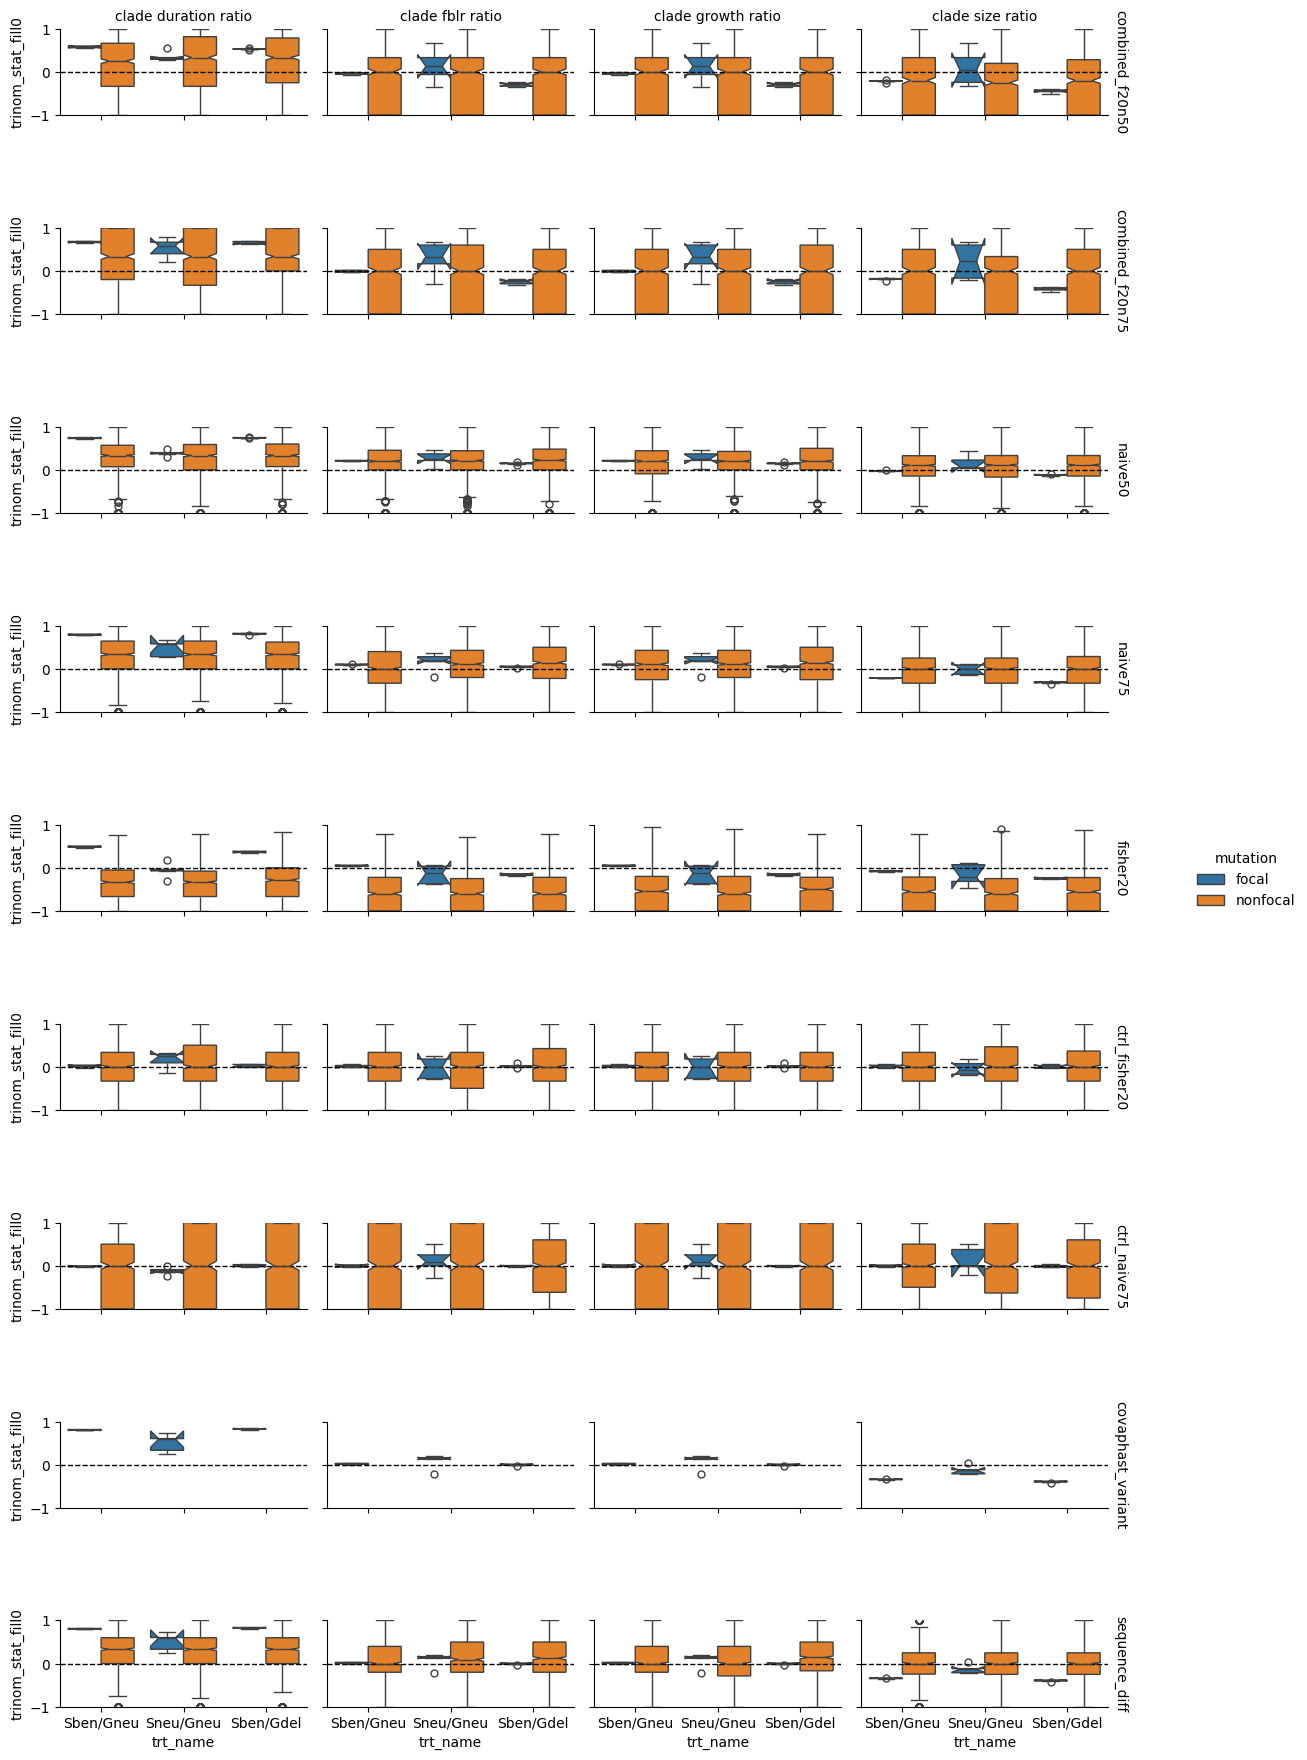

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.png


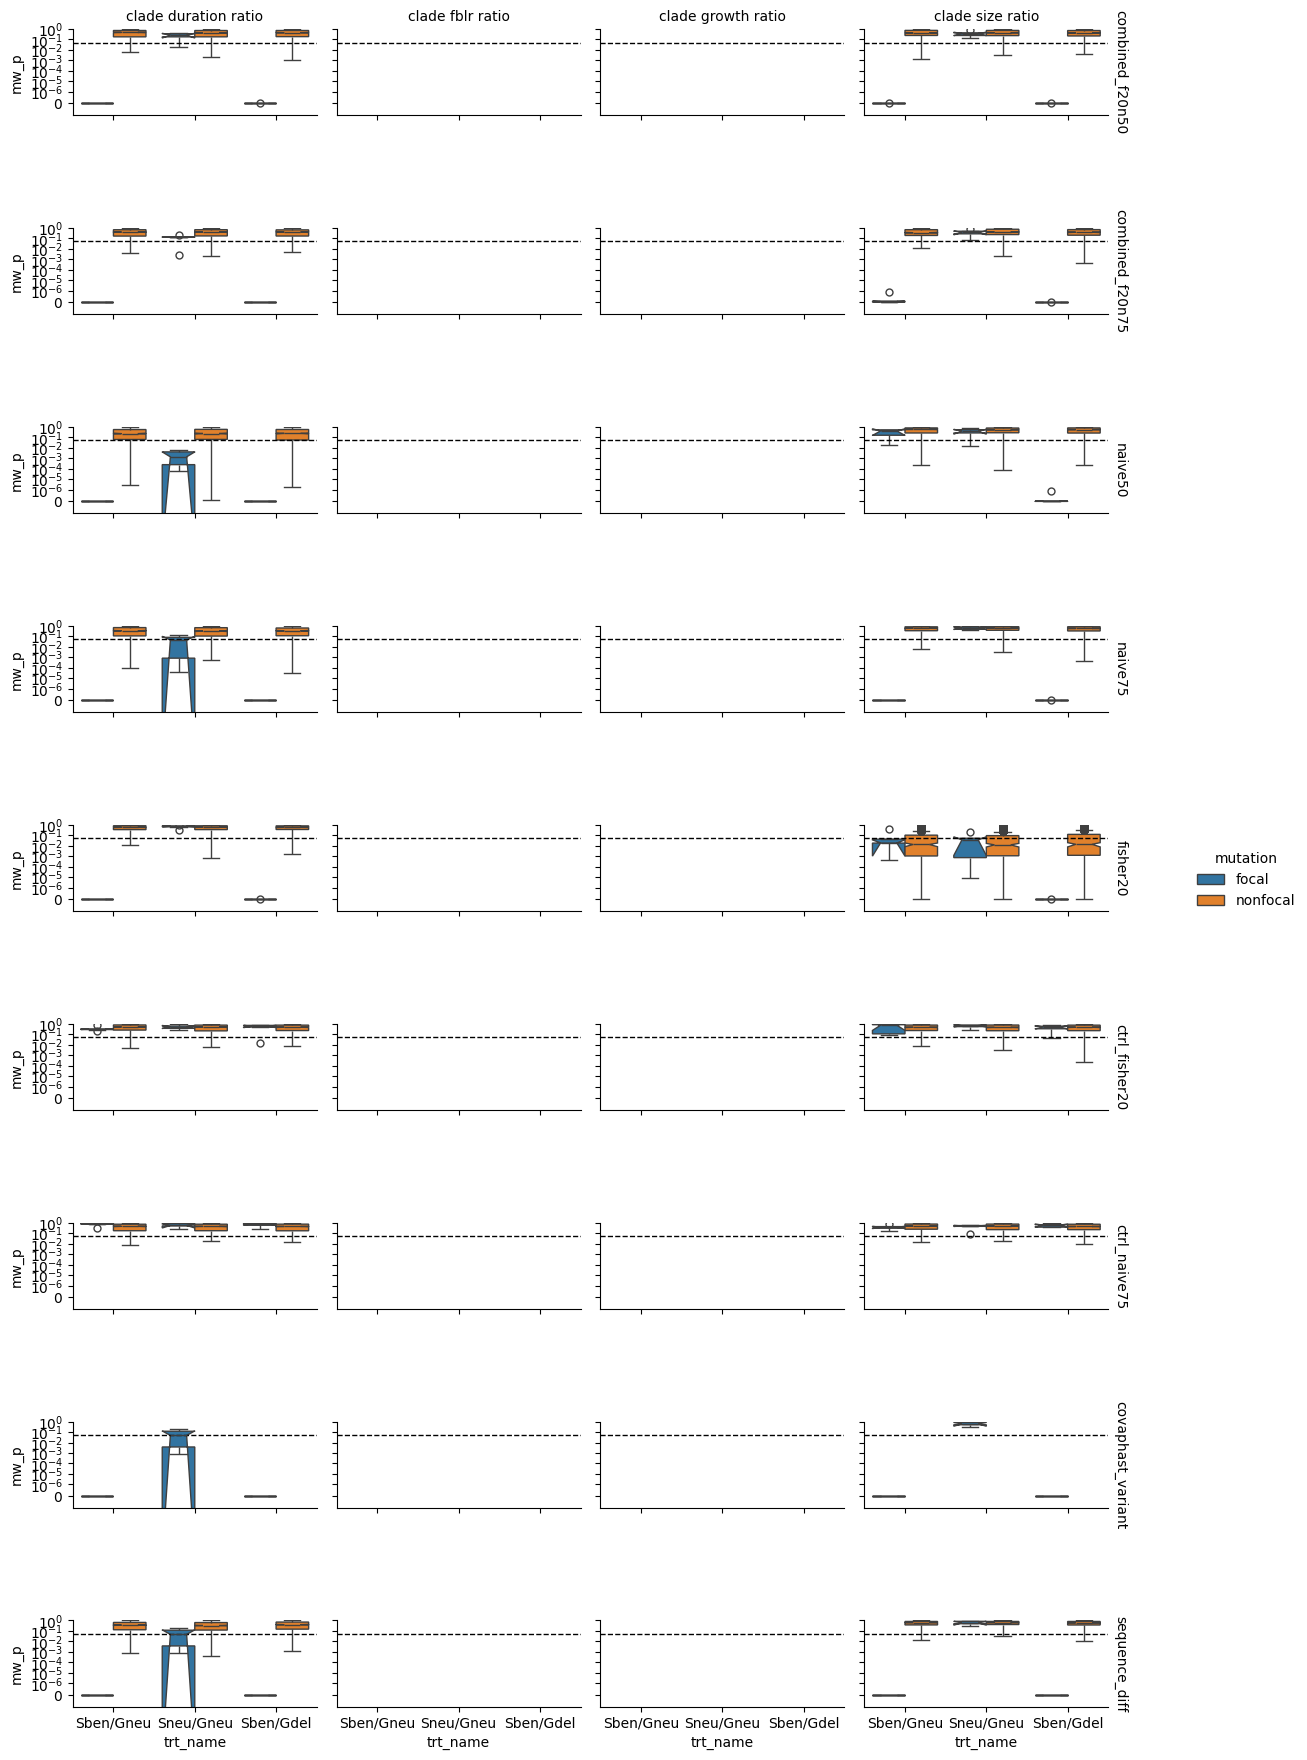

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.png


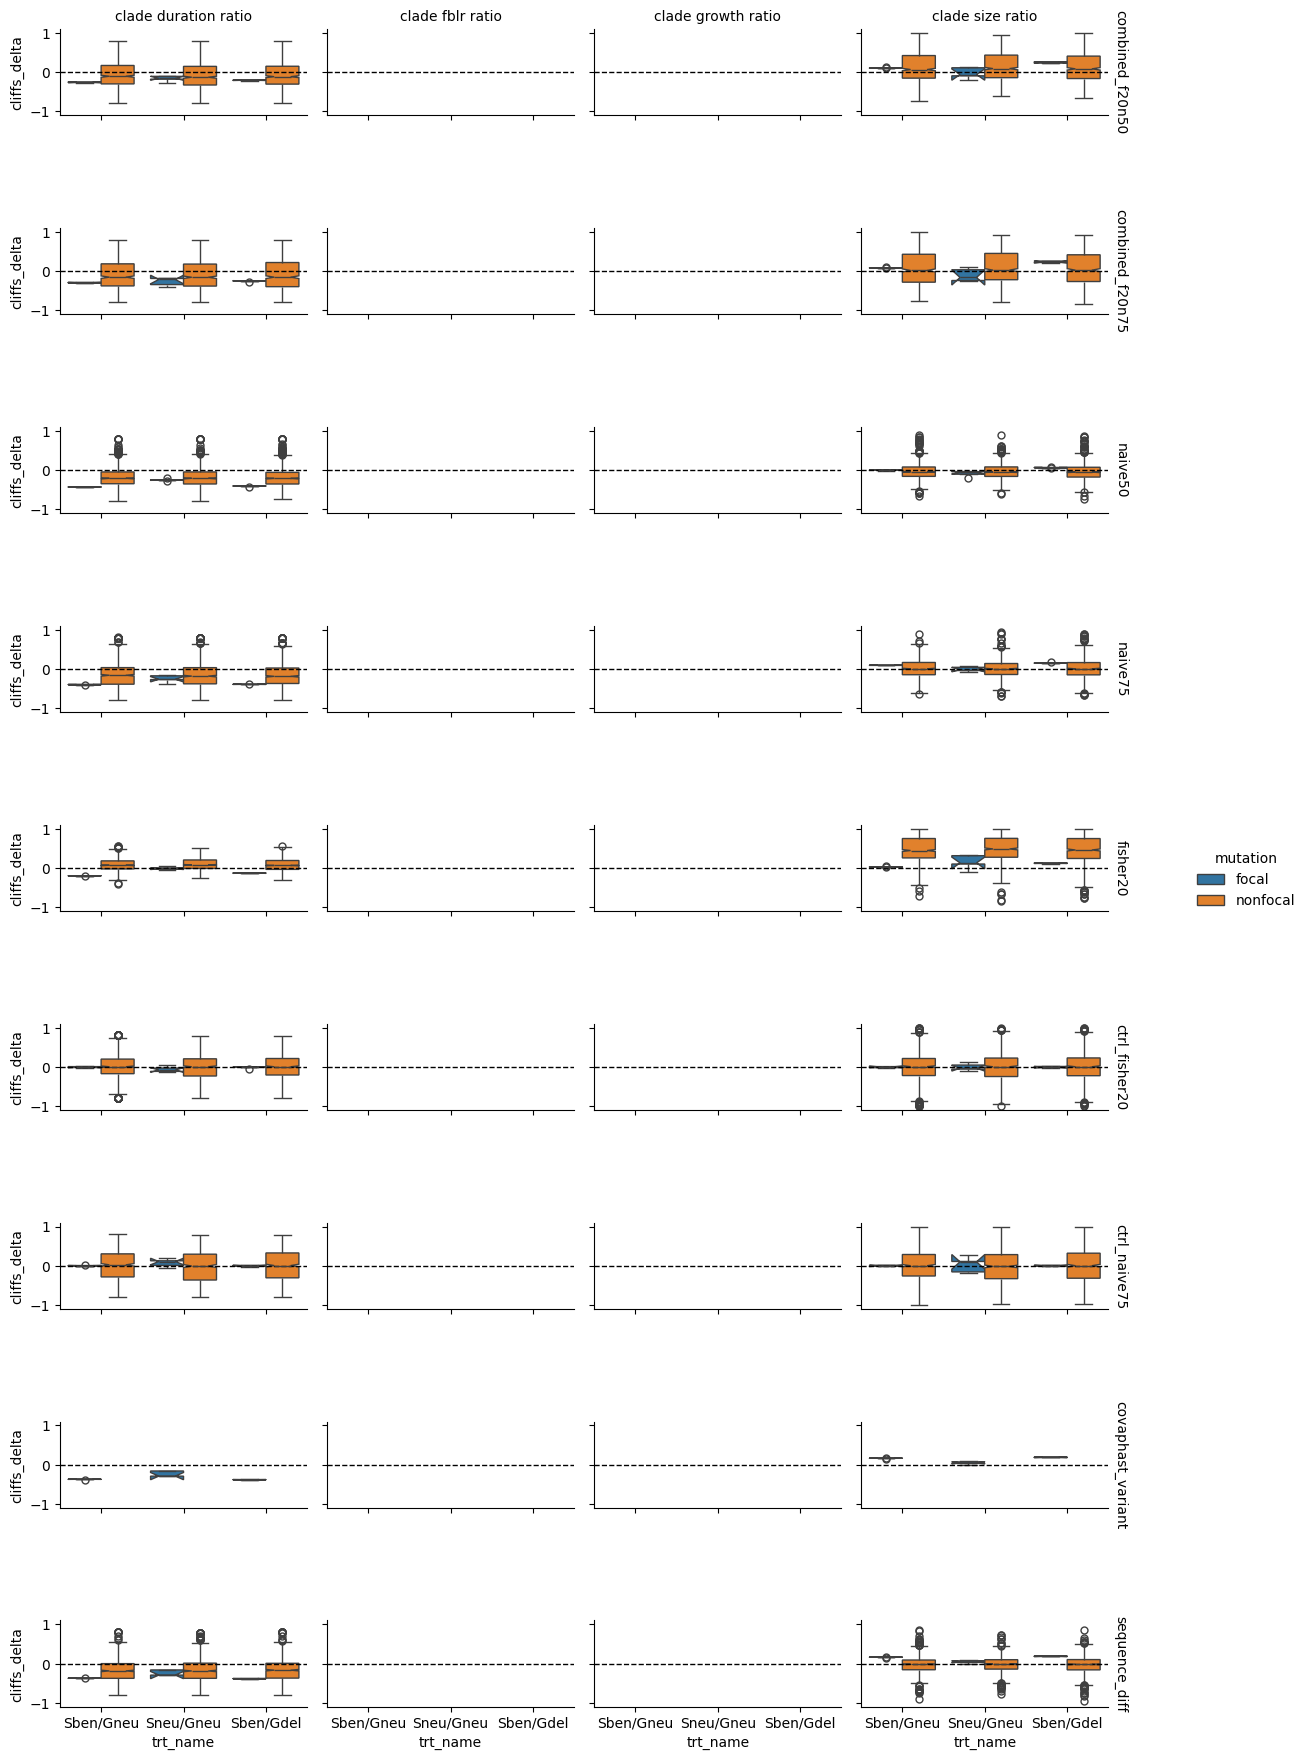

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.png


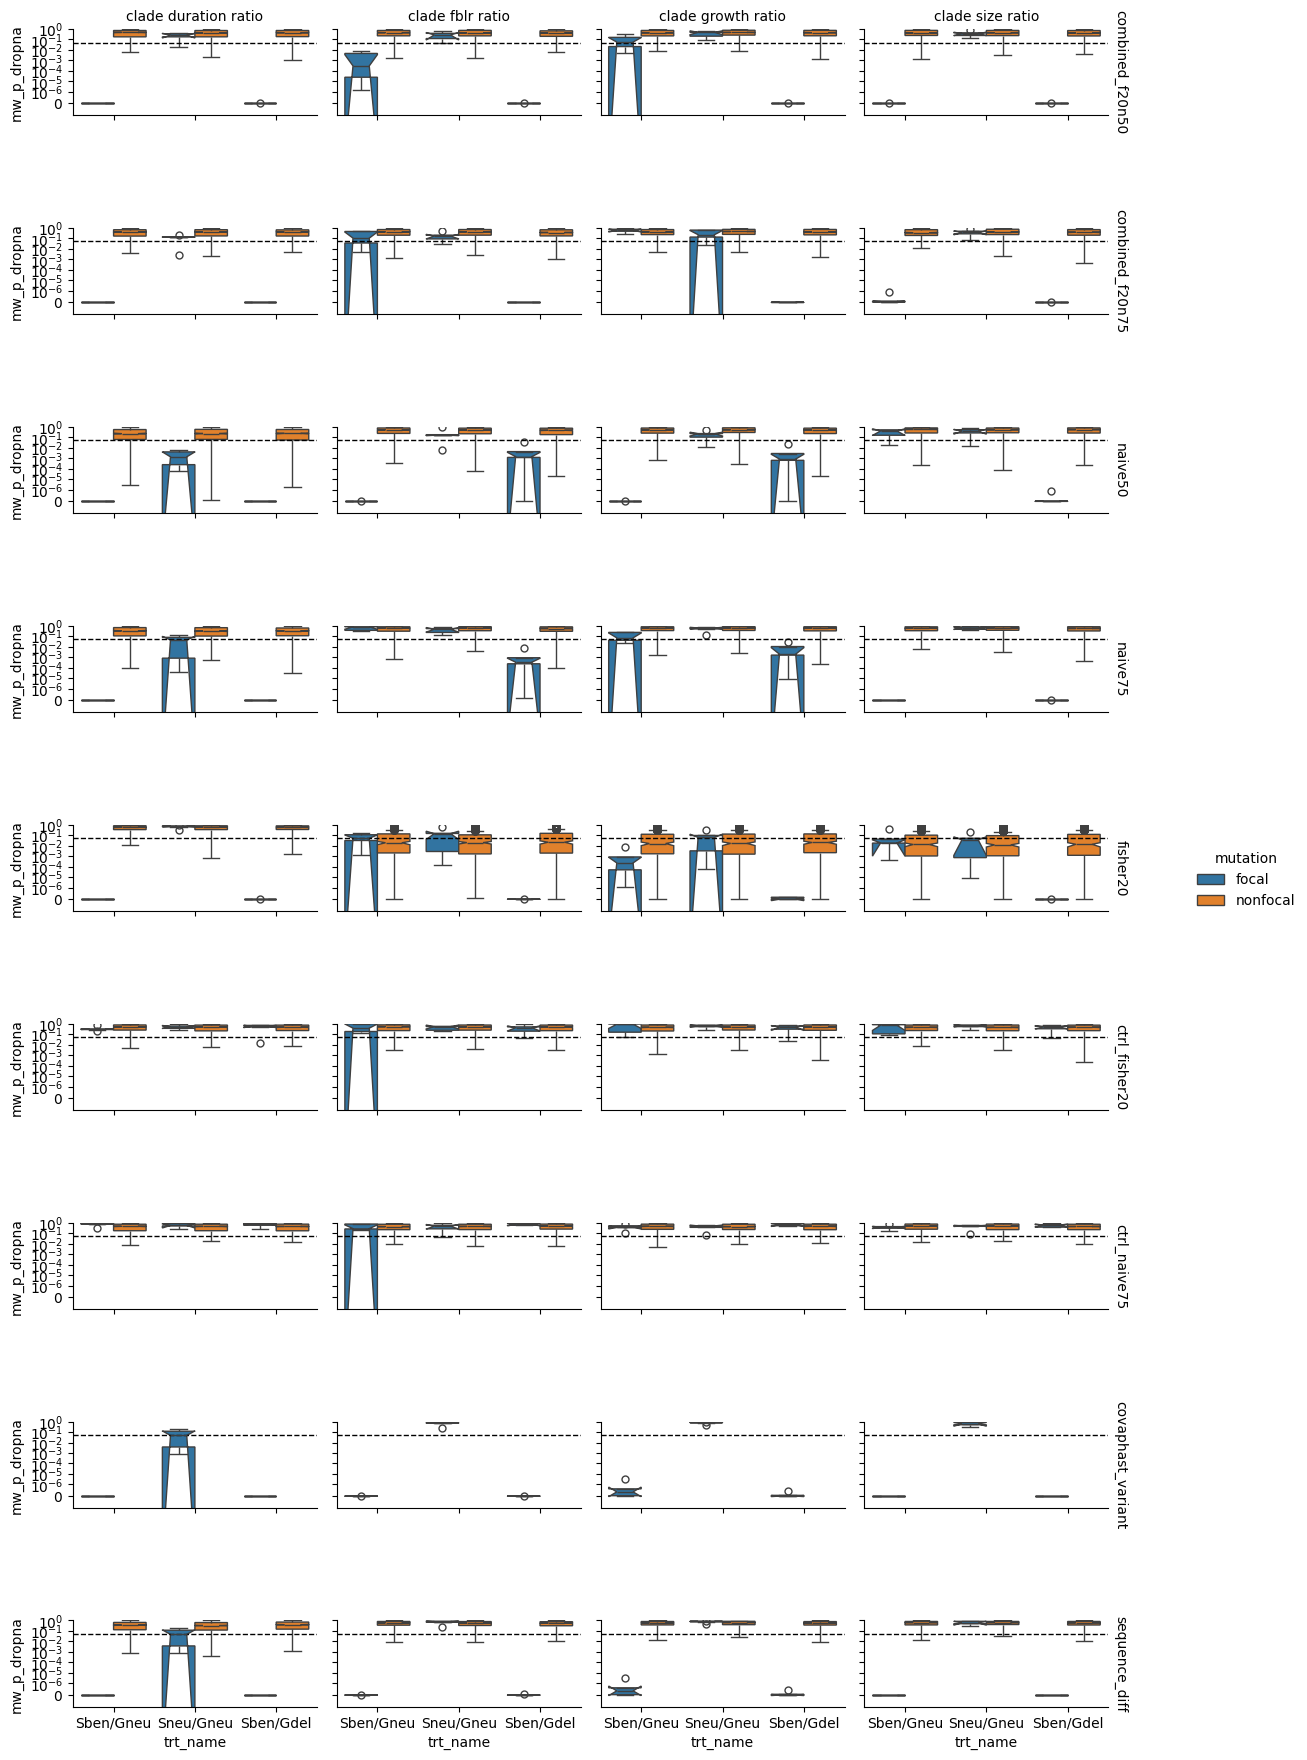

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.png


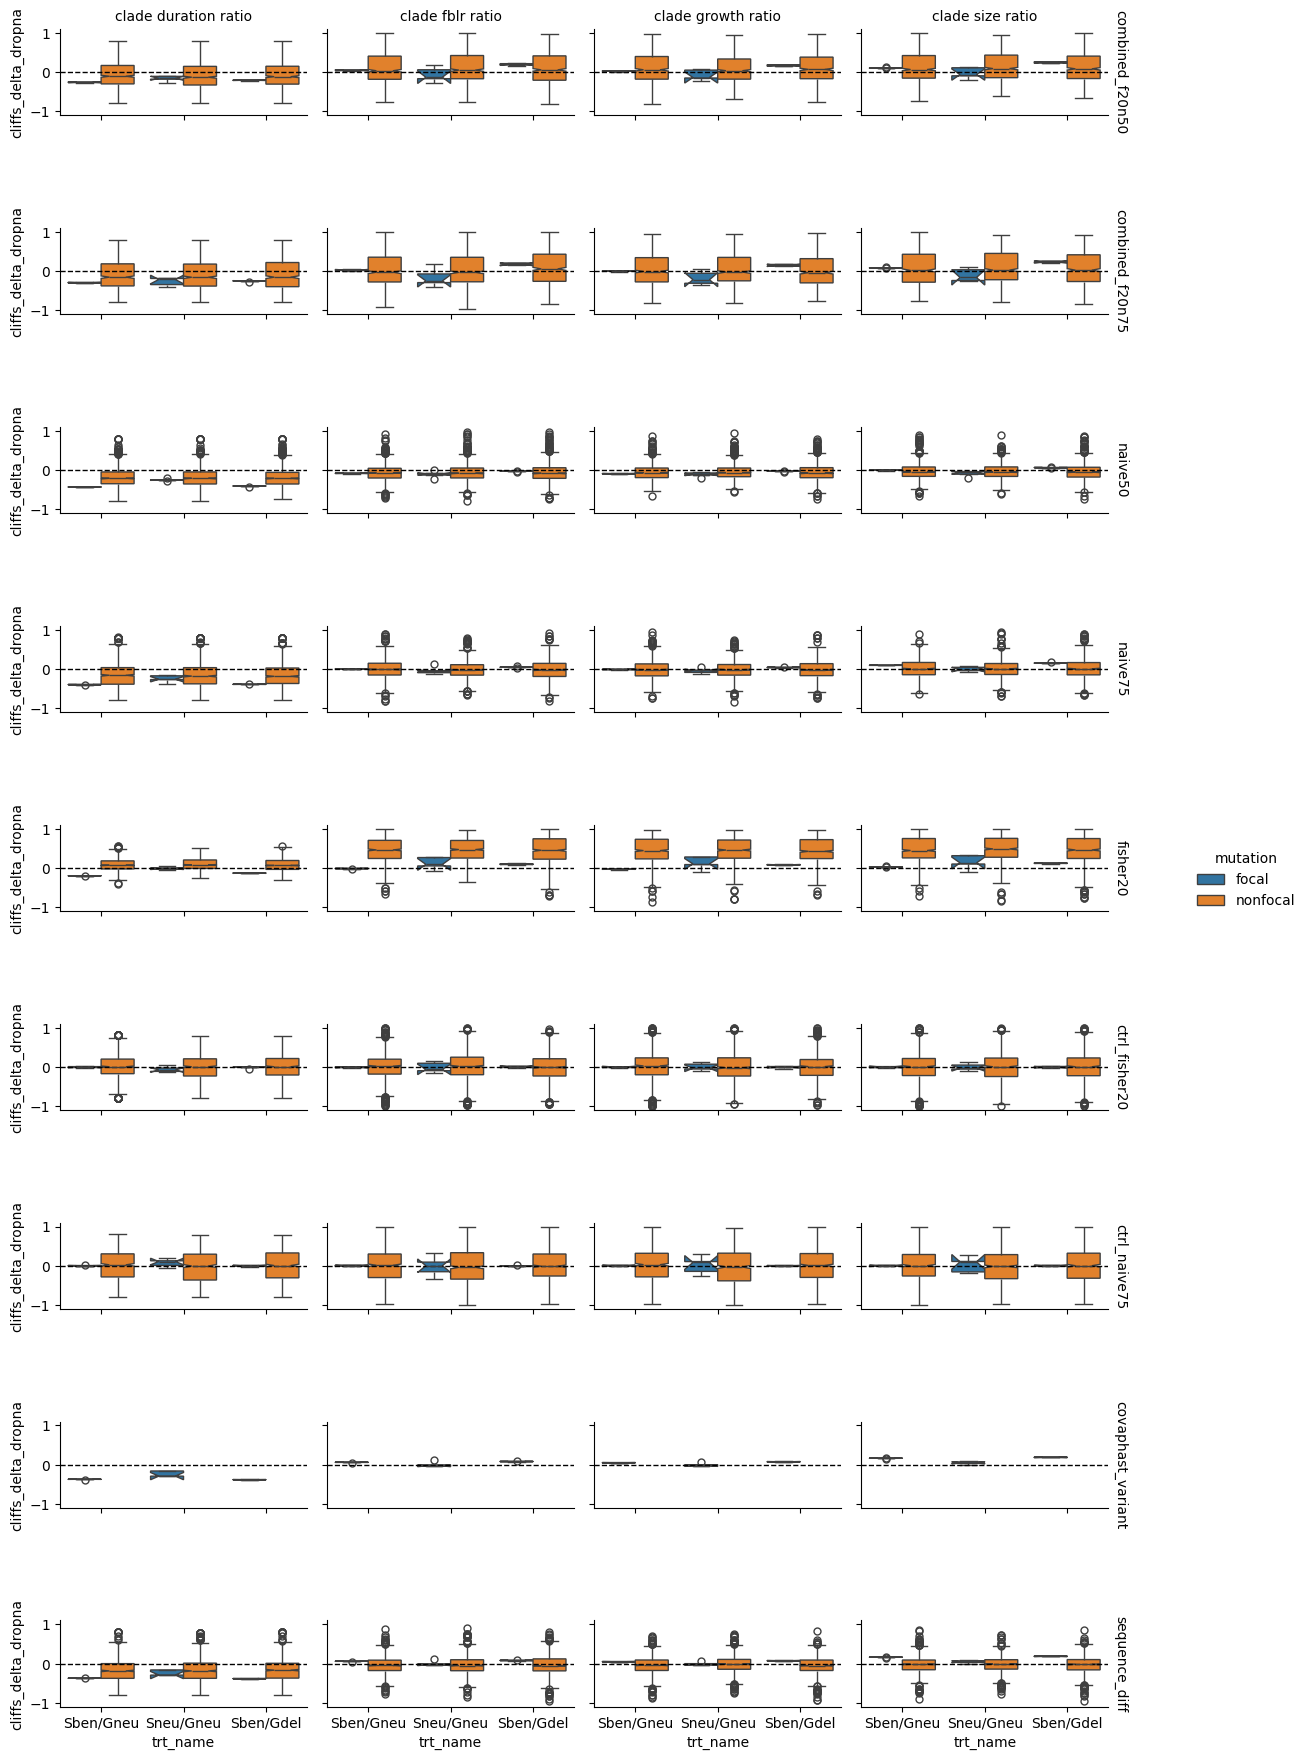

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.png


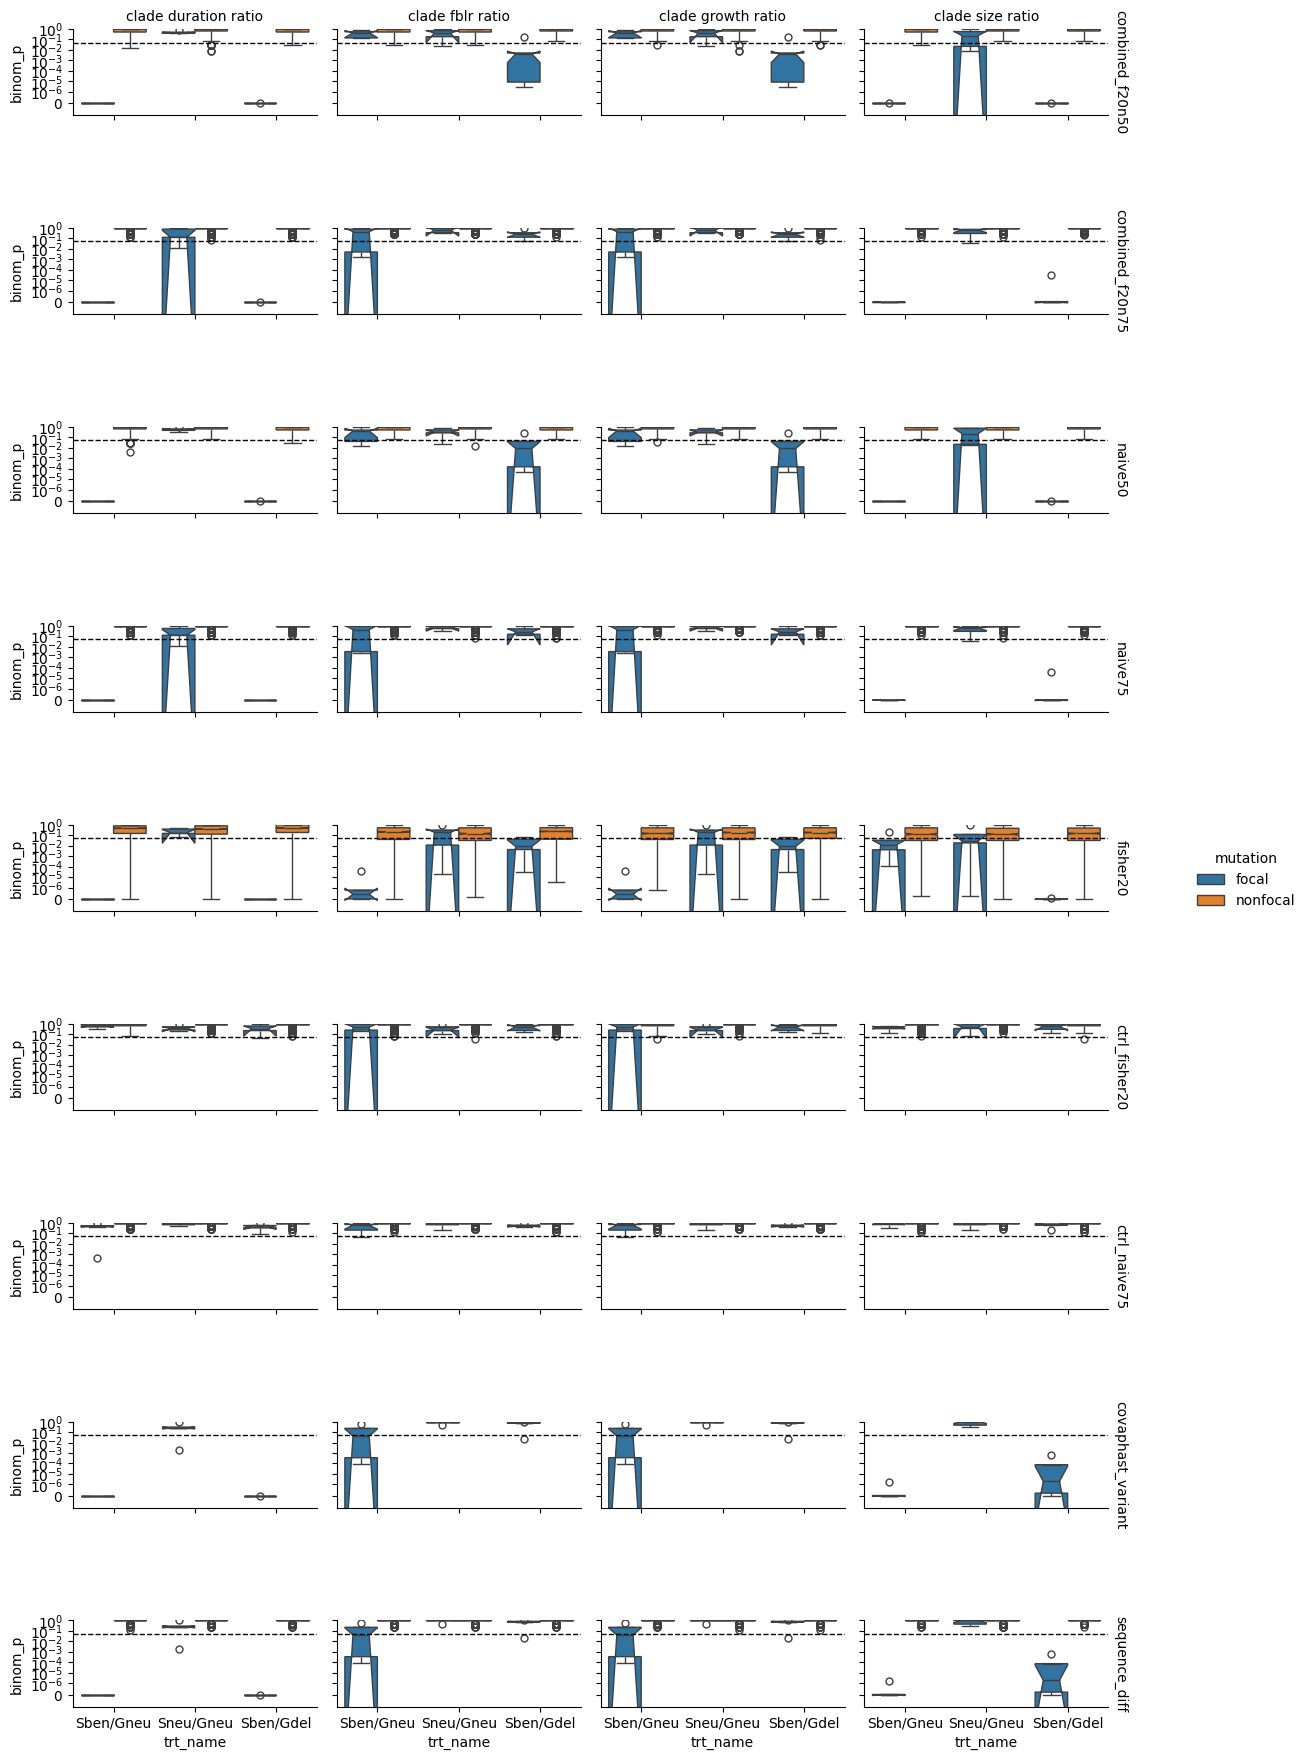

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.png


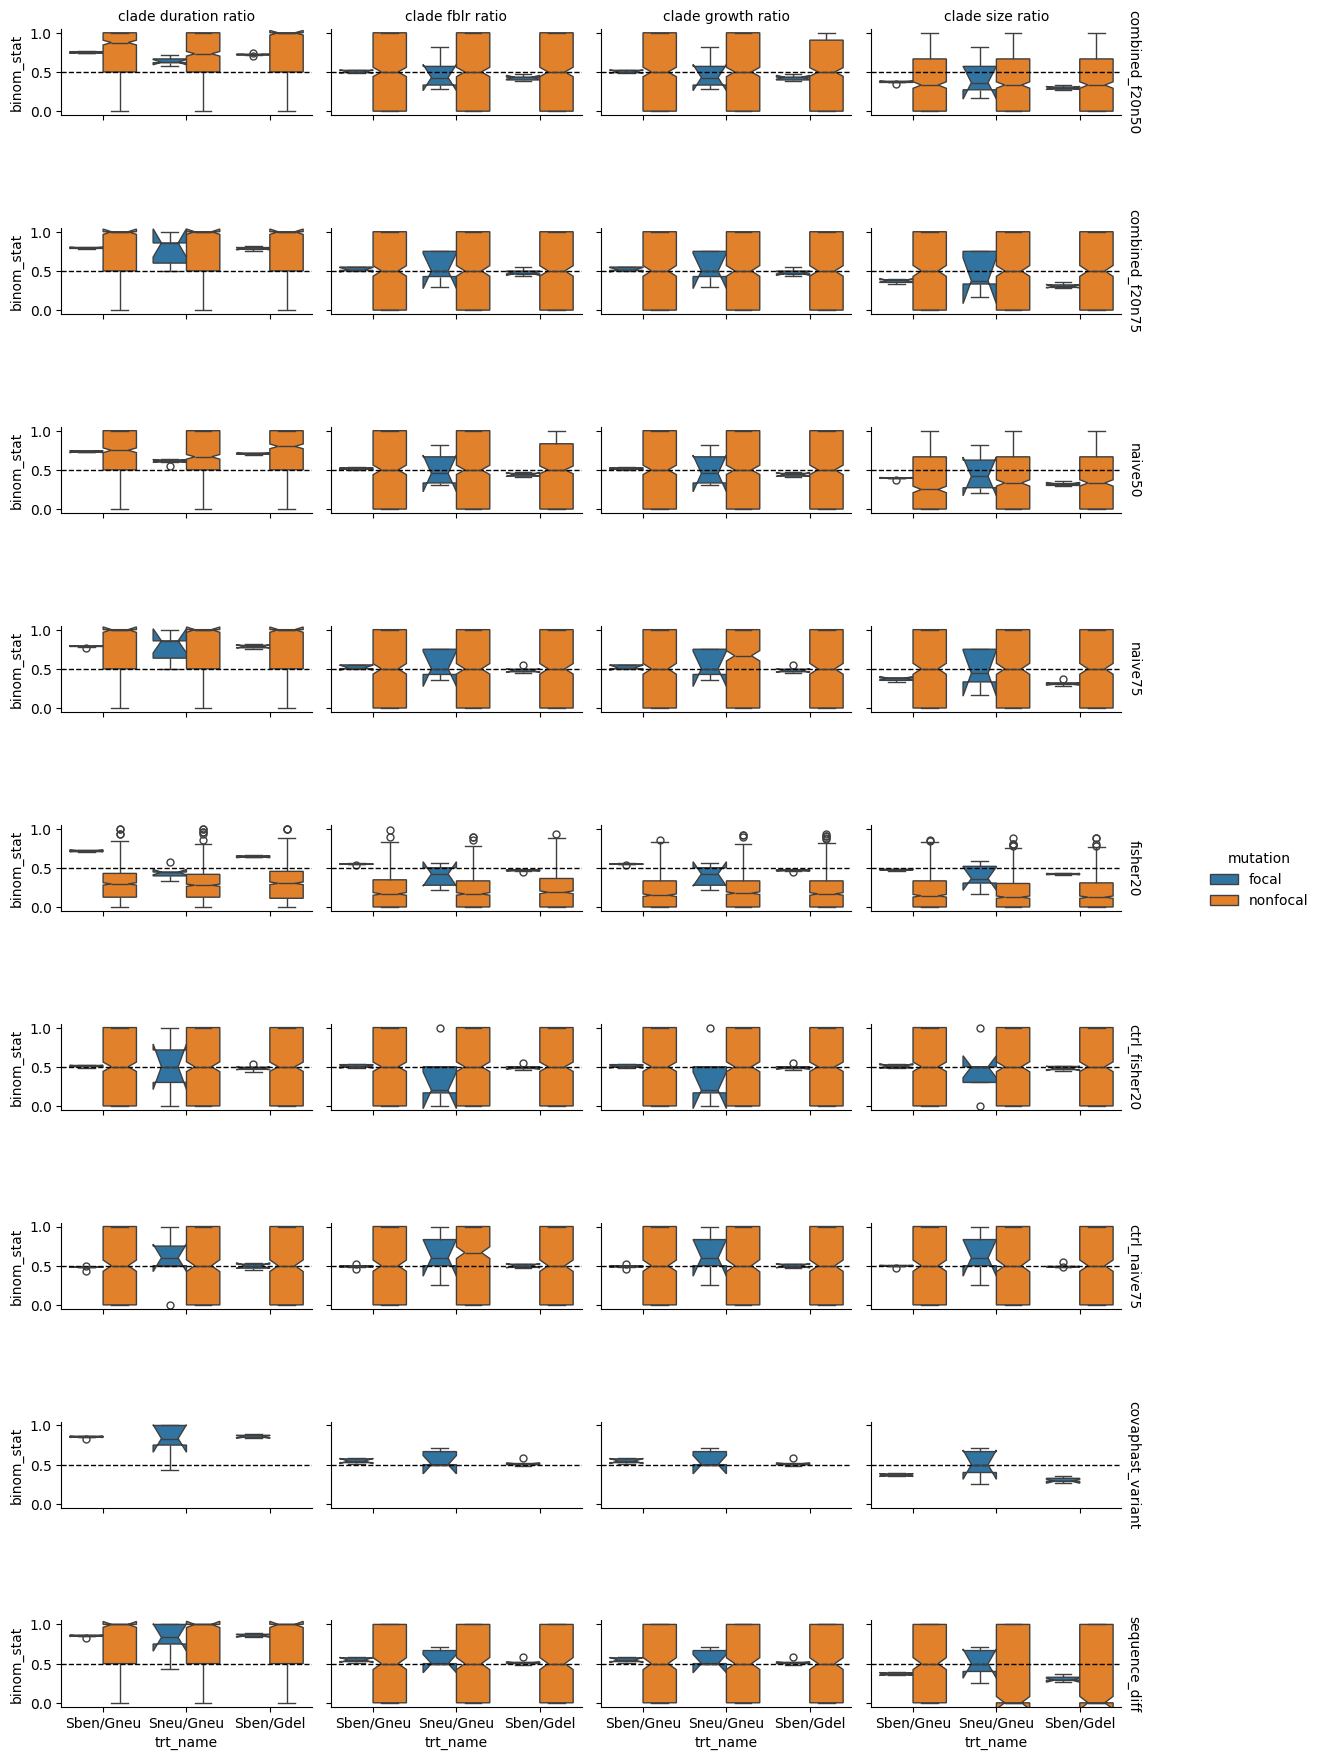

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.png


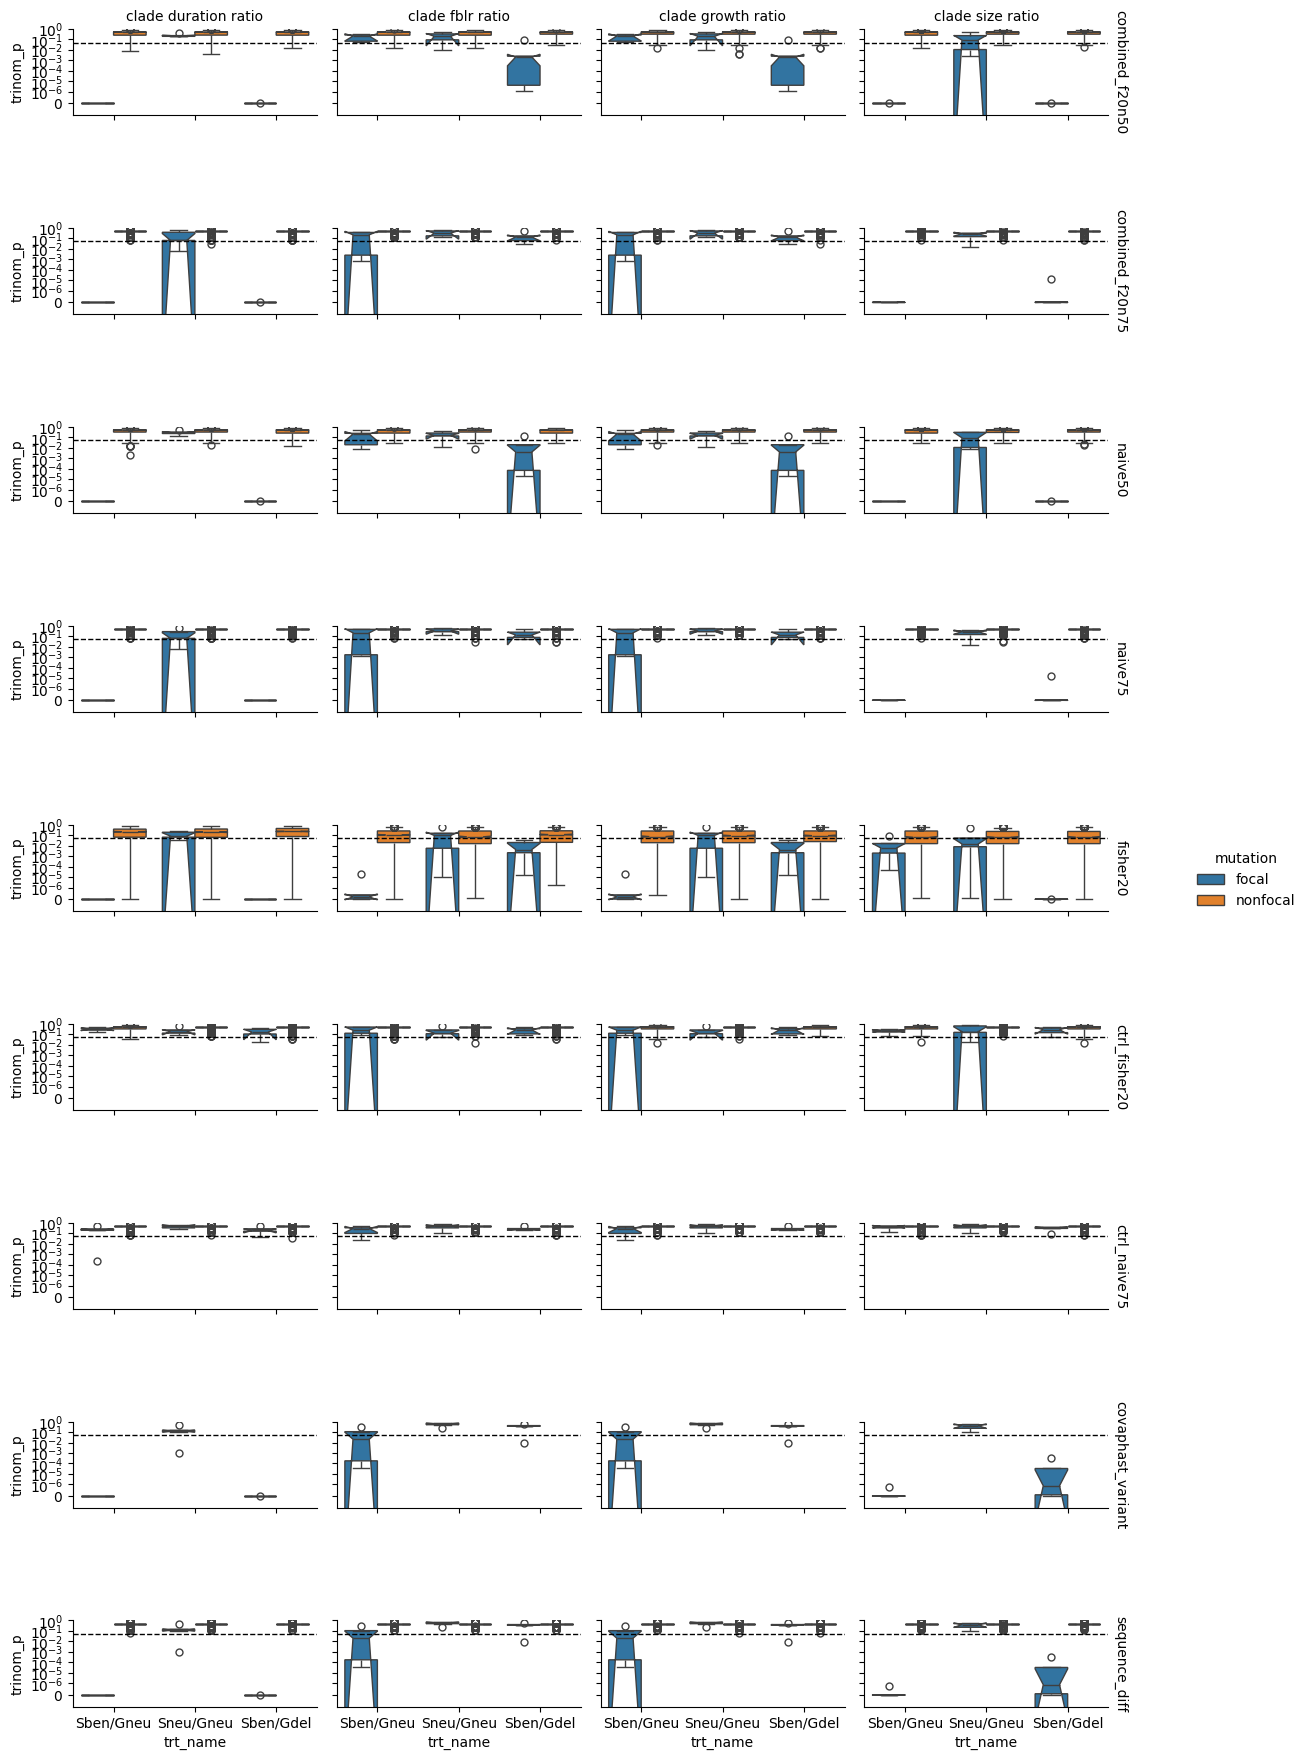

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.png


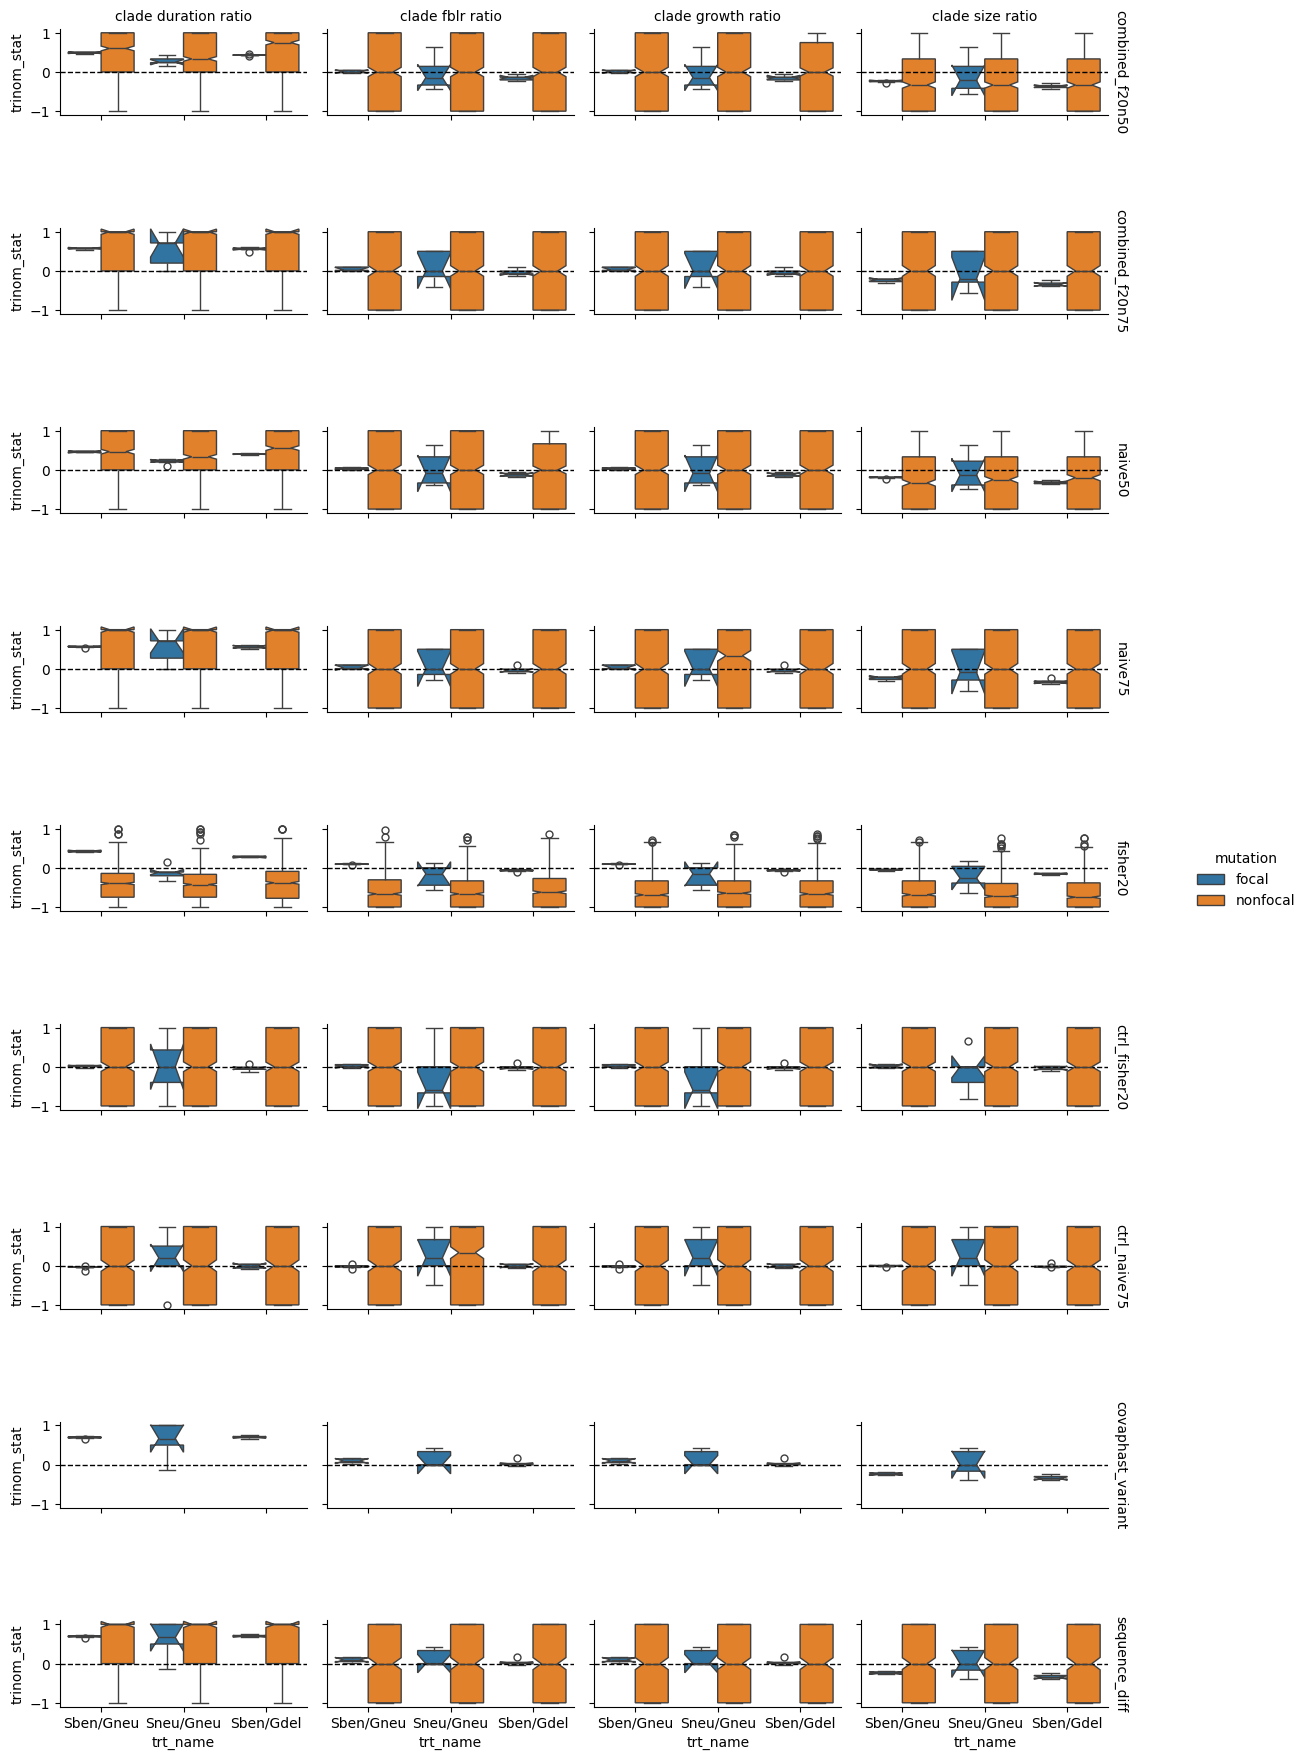

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.png


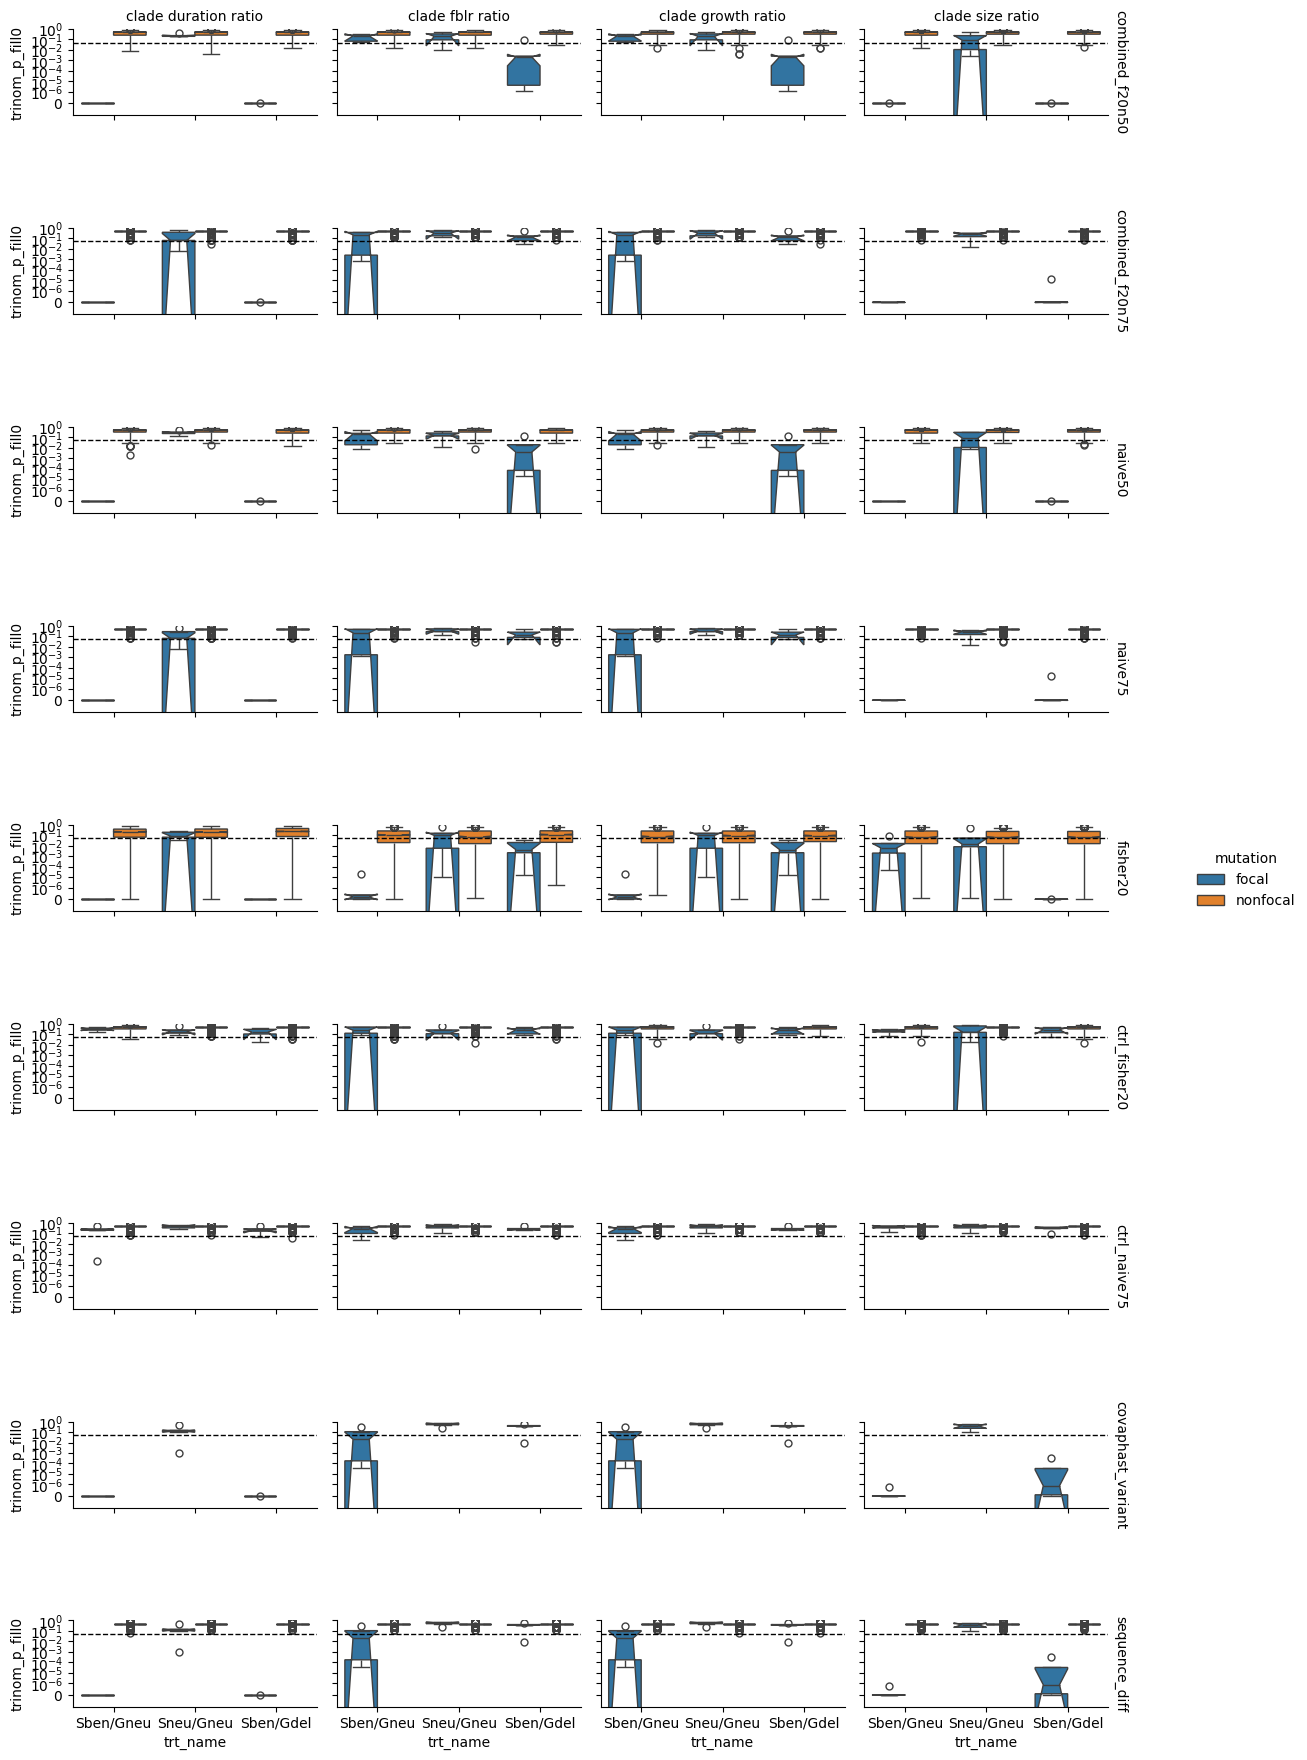

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.png


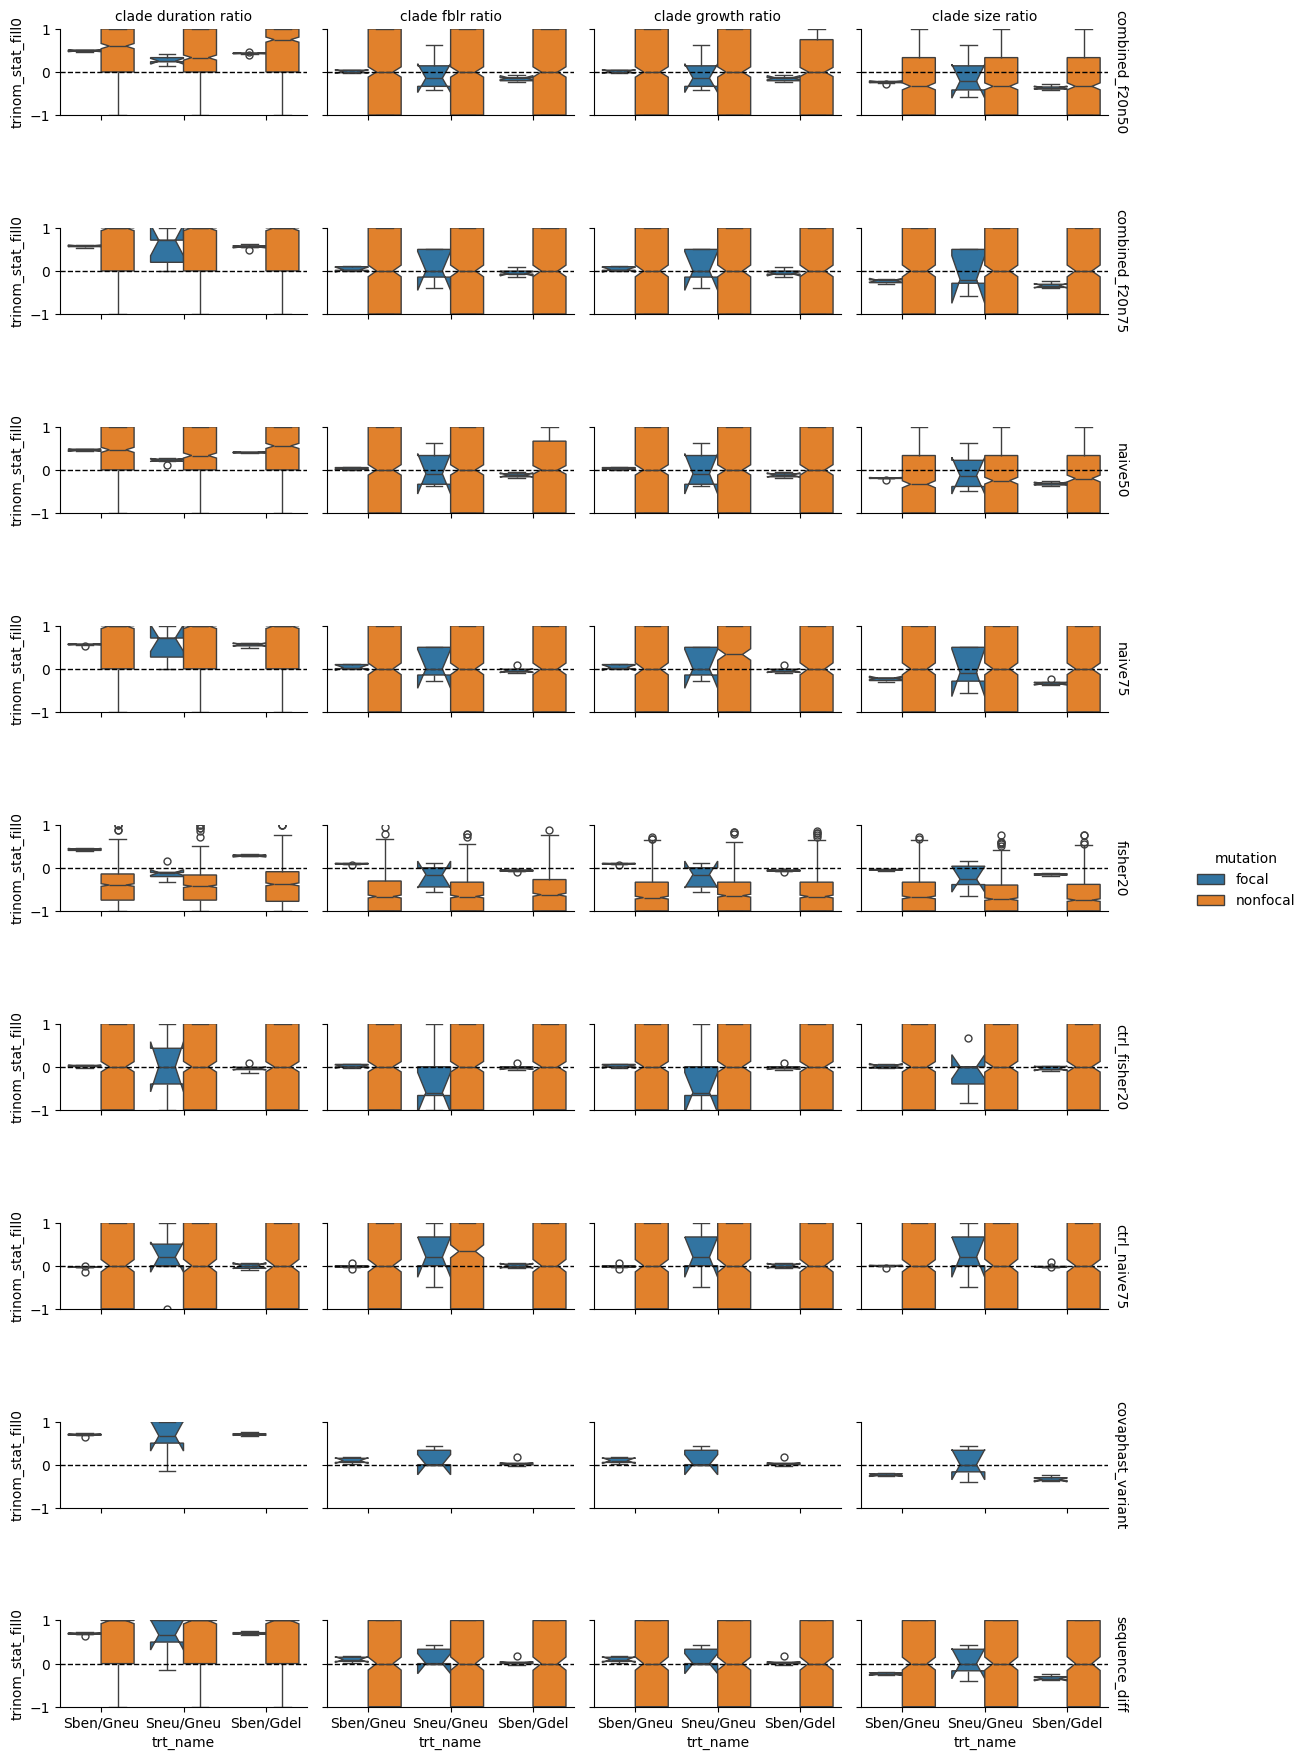

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.png


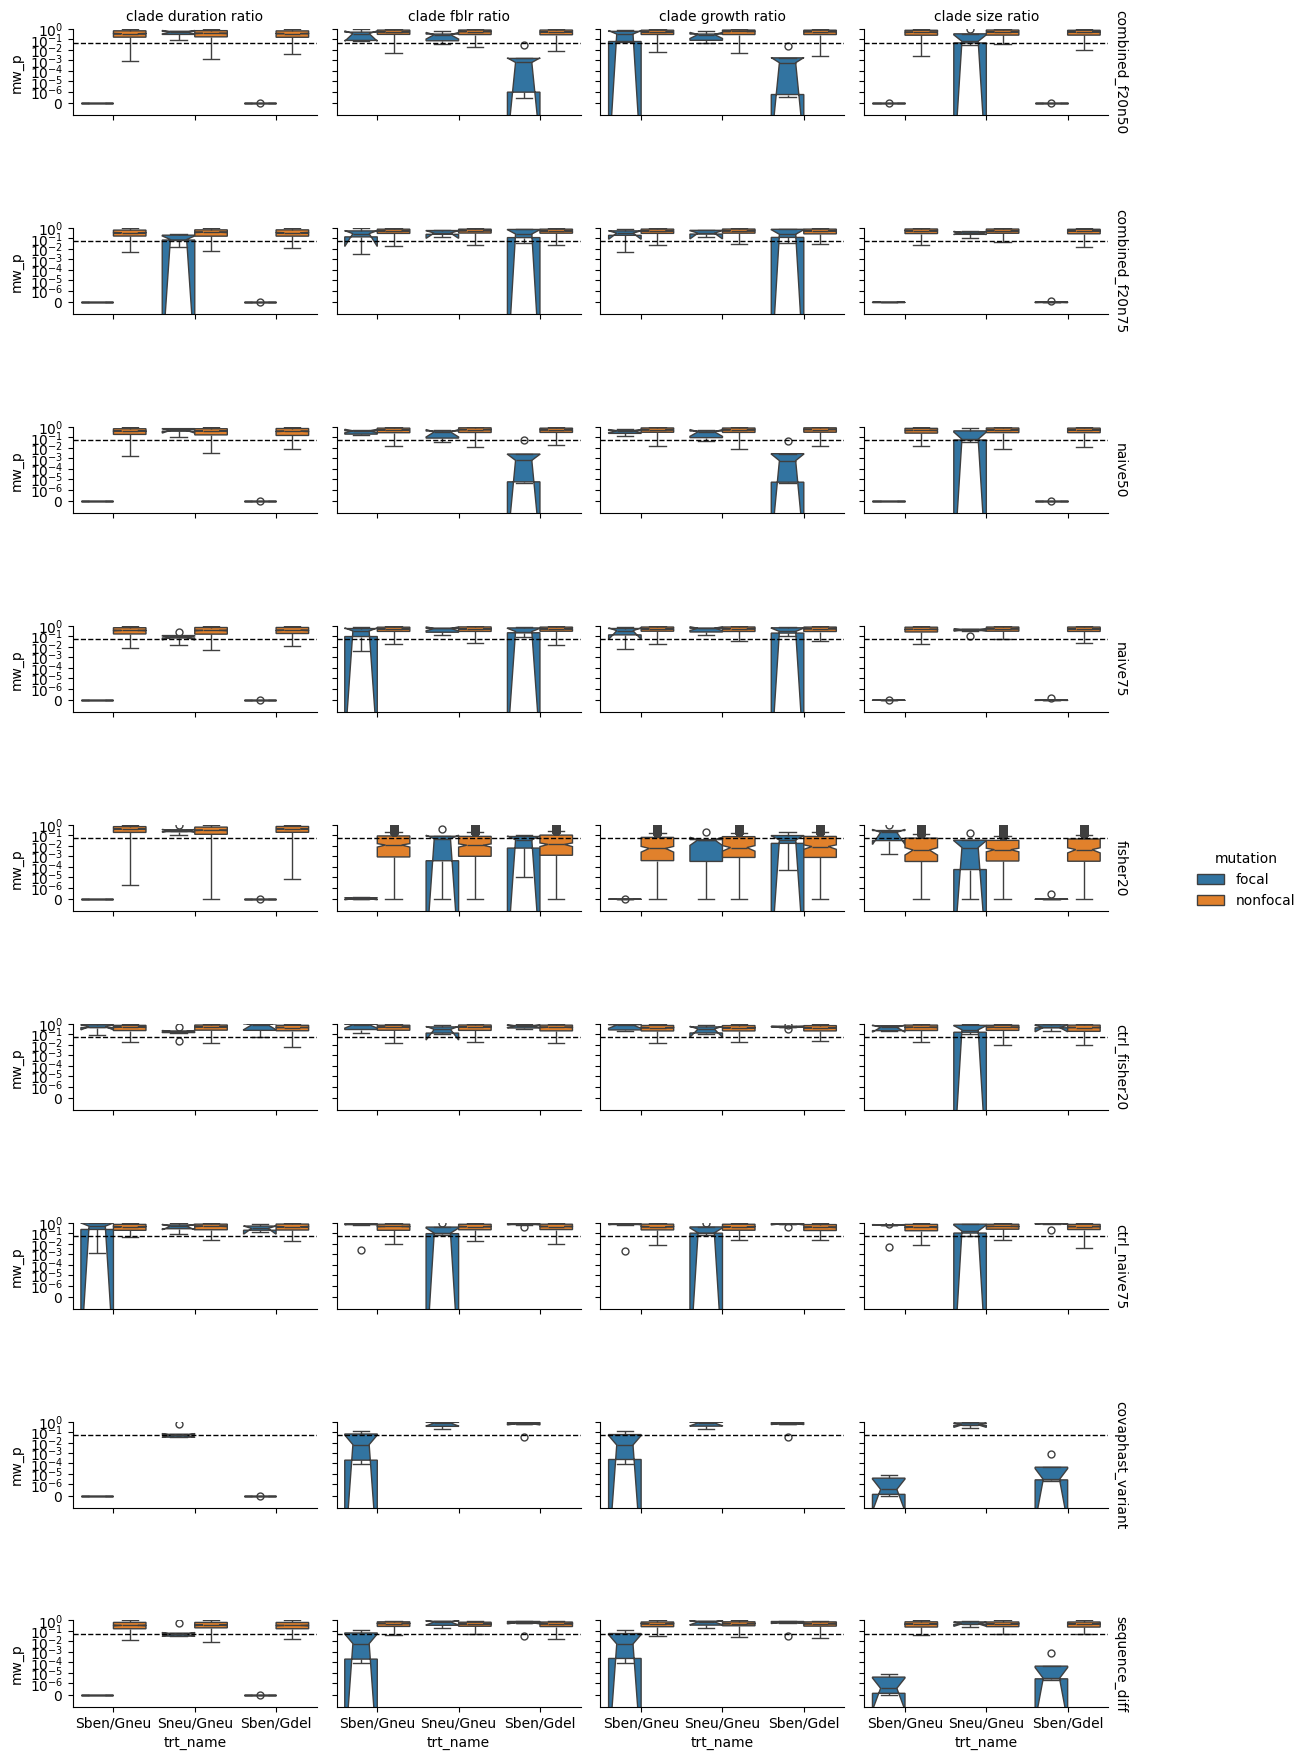

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.png


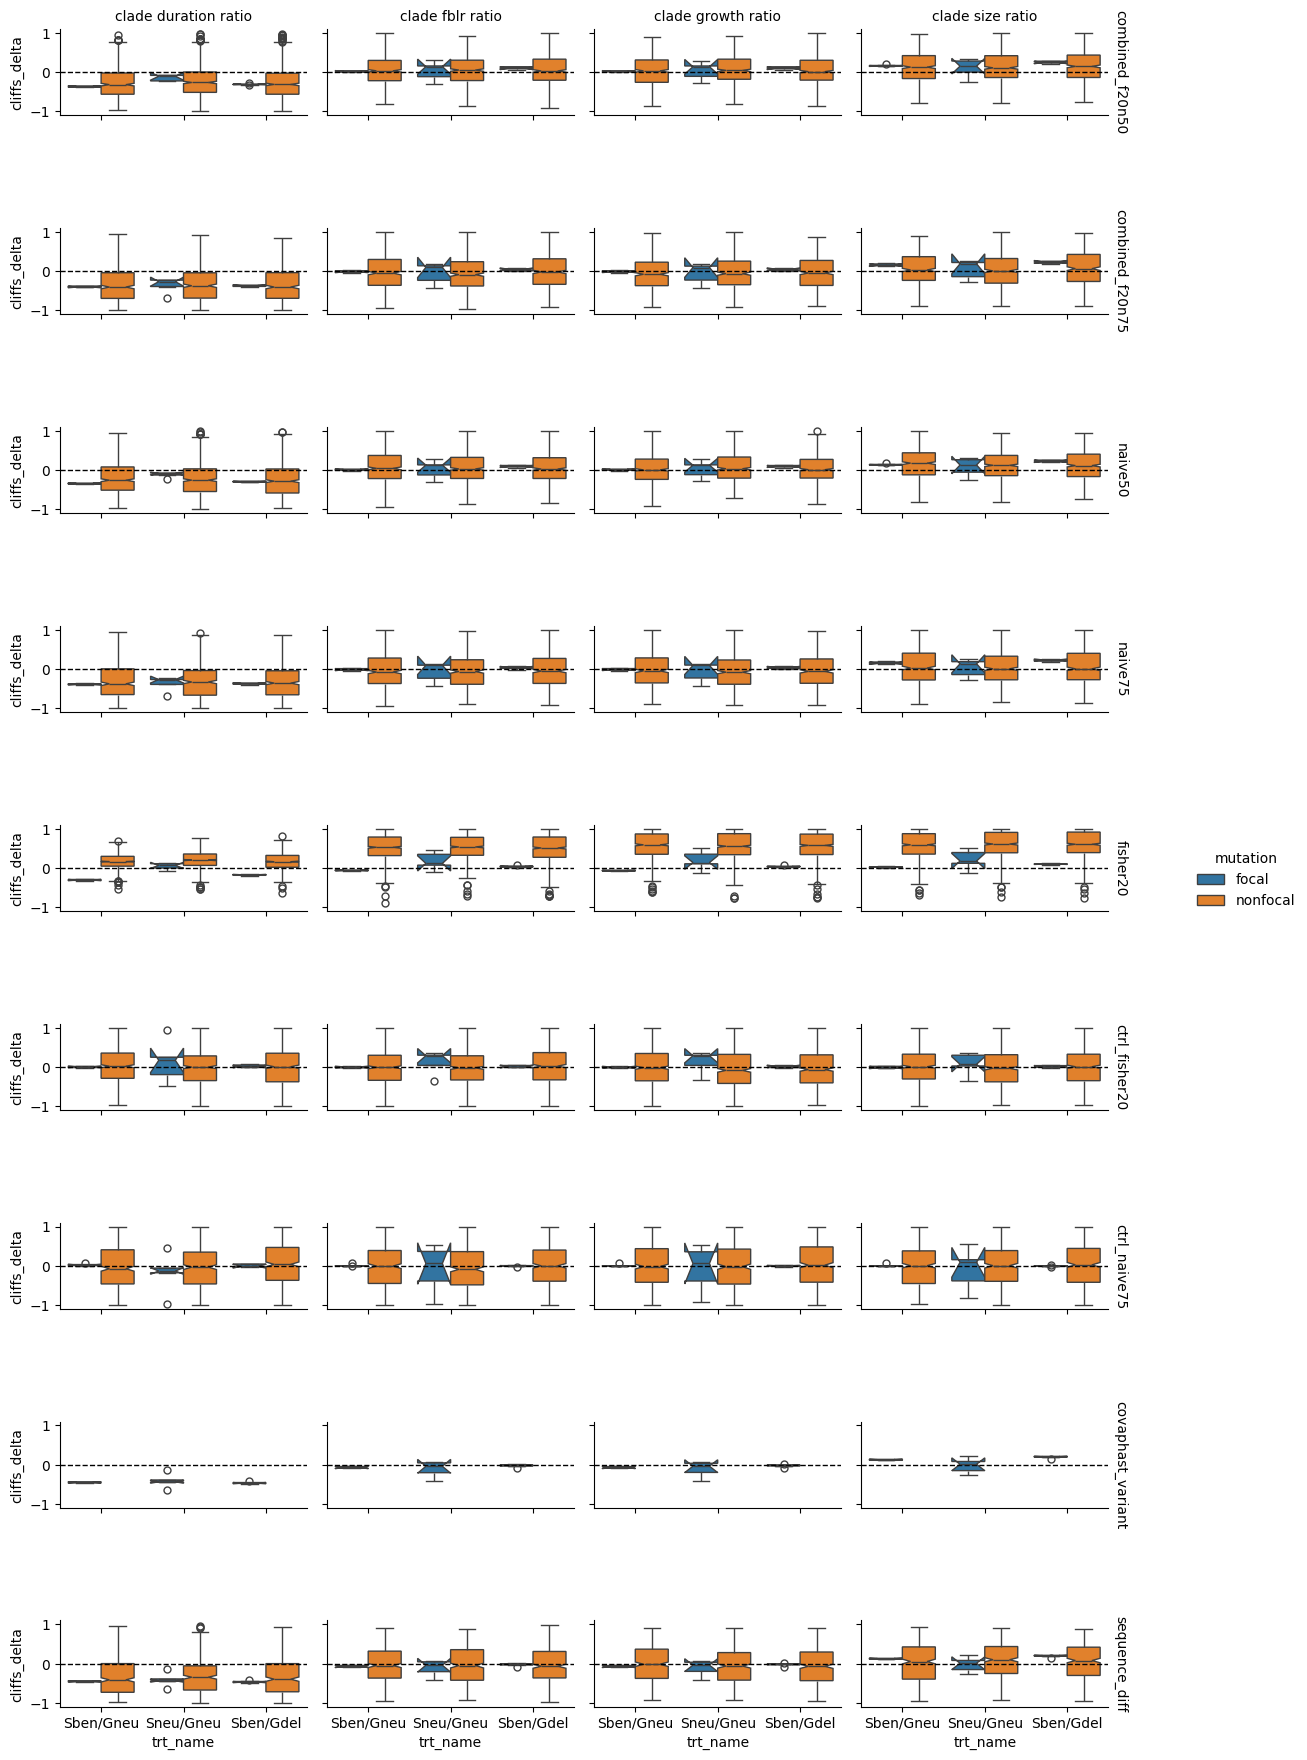

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.png


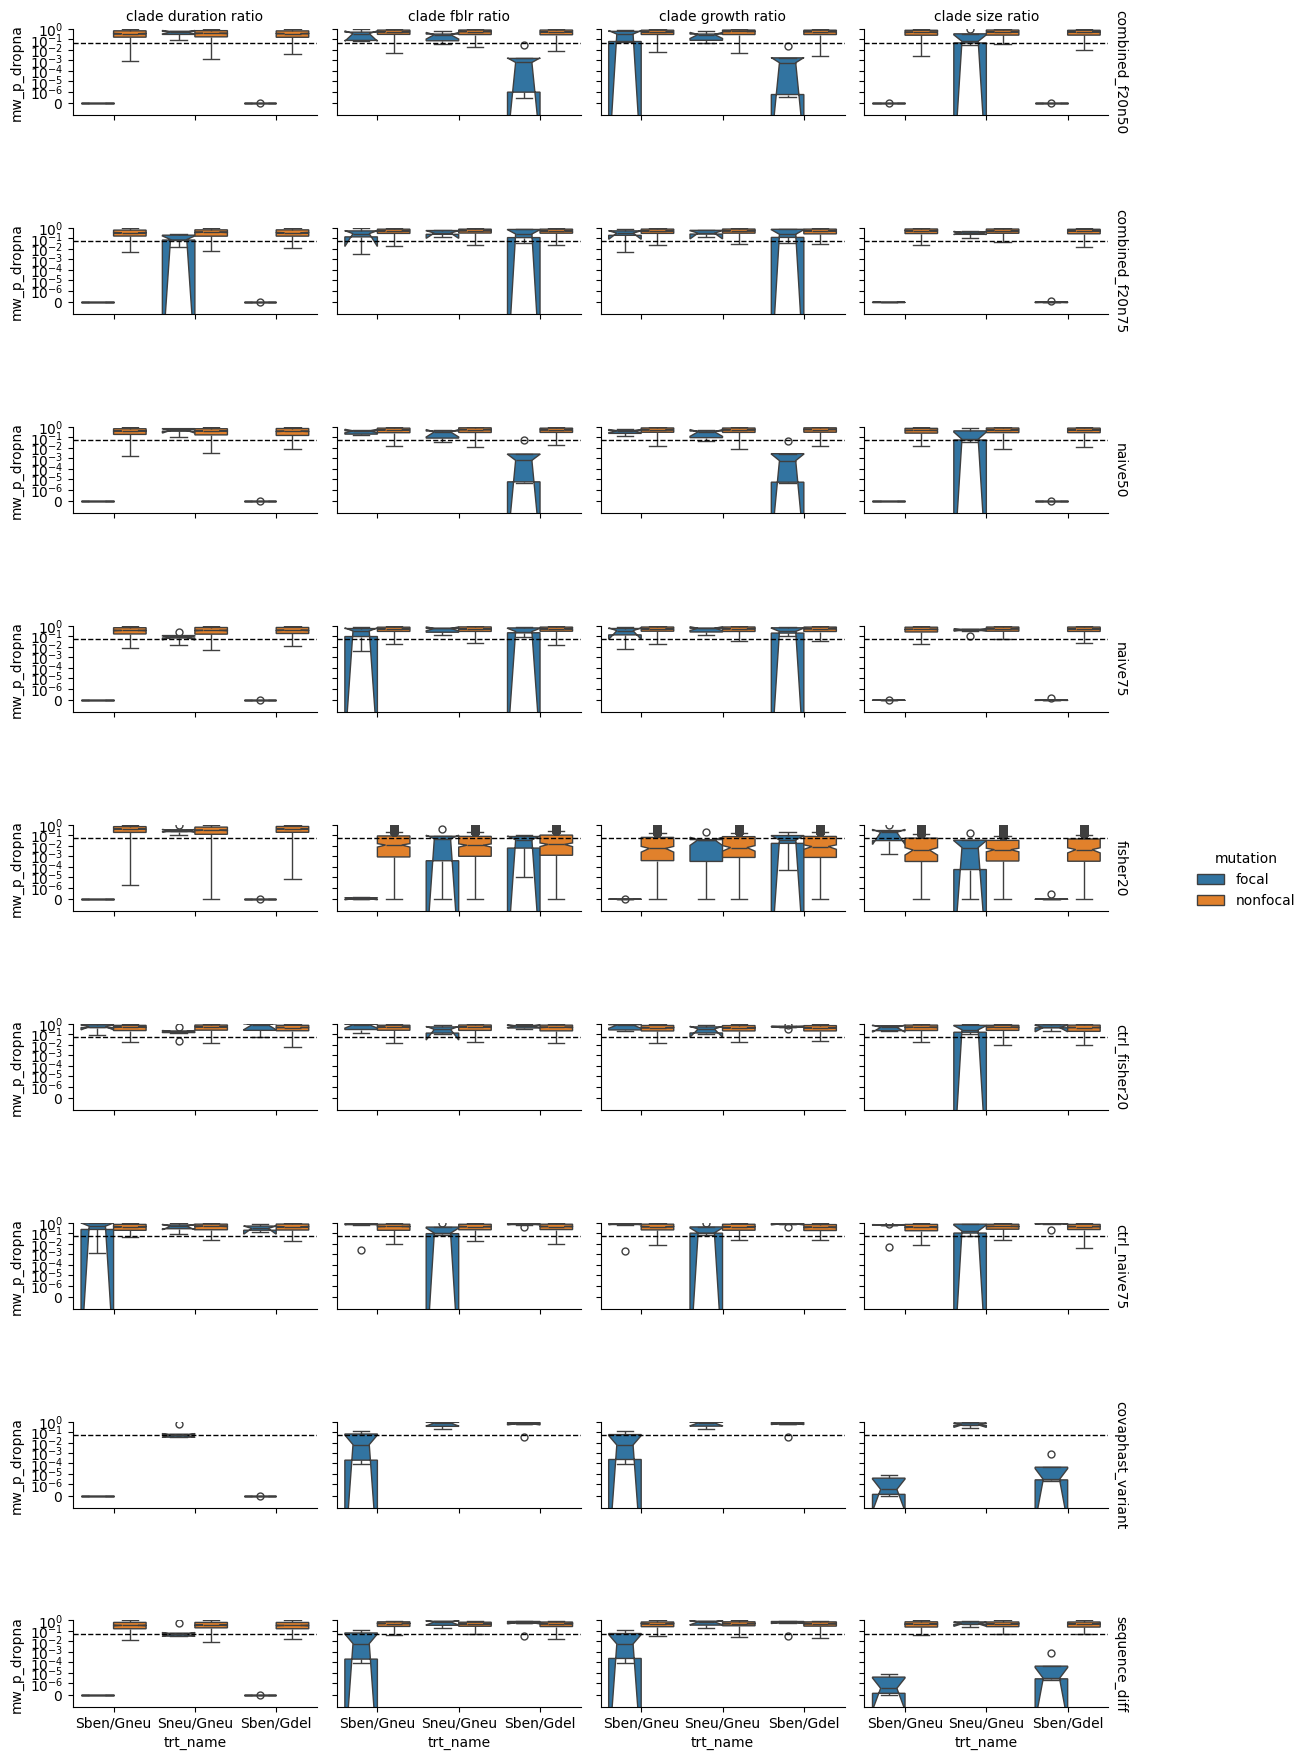

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.png


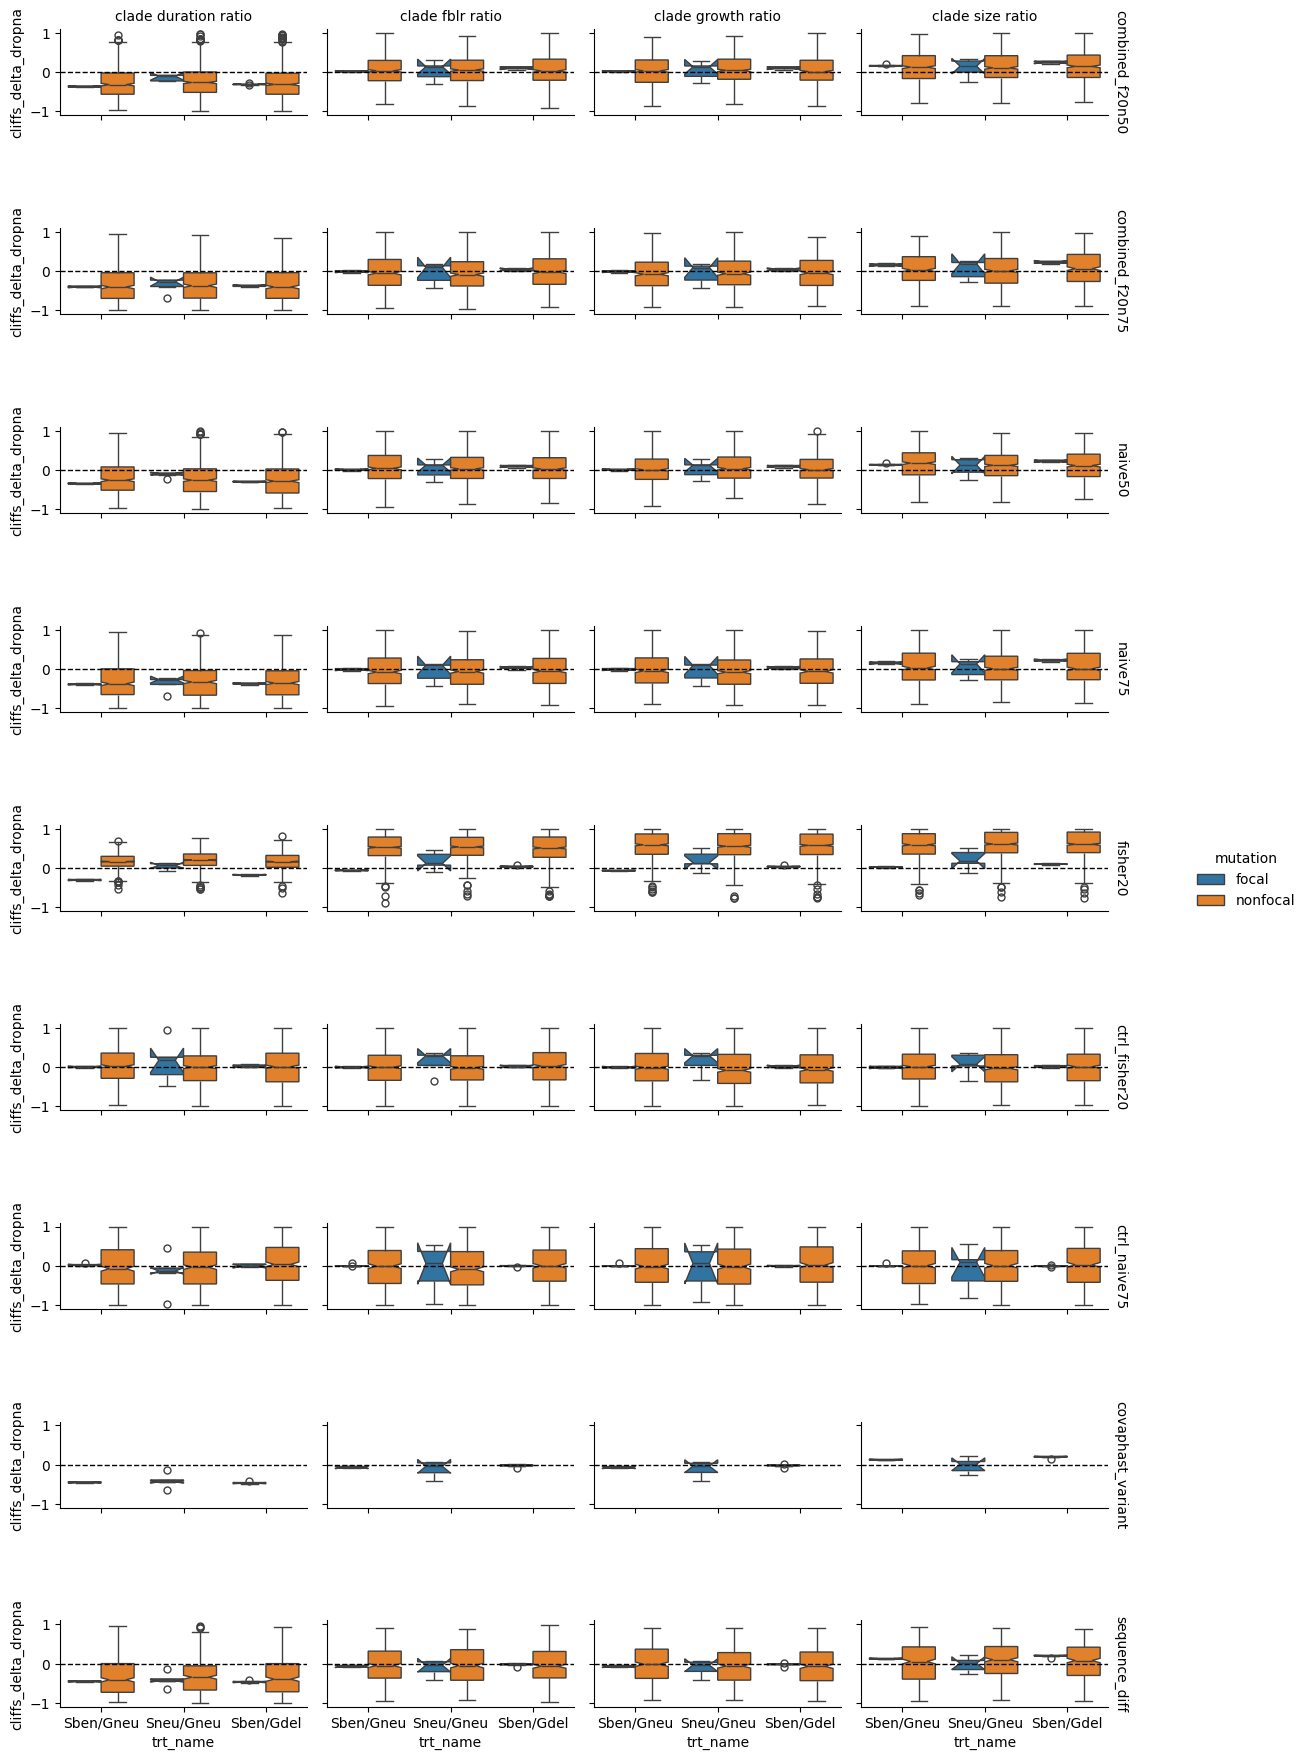

In [14]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    for stat in stats:
        display(HTML(f"<h3>{stat} {min_leaves=}</h3>"))
        with tp.teed(
            sns.catplot,
            data=grp,
            x="trt_name",
            y=stat,
            hue="mutation",
            row="screen_name",
            col="tb_stat",
            kind="box",
            aspect=1.5,
            height=2,
            notch=True,
            margin_titles=True,
        ) as teed:
            teed.set_titles(
                row_template="{row_name}",
                col_template="{col_name}",
            )
            teed.set(
                ylim={
                    "binom_p": (-1e-6, 1),
                    "binom_stat": (-0.05, 1.05),
                    "trinom_p": (-1e-6, 1),
                    "trinom_stat": (-1.1, 1.1),
                    "trinom_p_fill0": (-1e-6, 1),
                    "trinom_stat_fill0": (-1, 1),
                    "mw_p": (-1e-6, 1),
                    "cliffs_delta": (-1.1, 1.1),
                    "mw_p_dropna": (-1e-6, 1),
                    "cliffs_delta_dropna": (-1.1, 1.1),
                }[stat],
            )
            if "_p" not in stat:
                teed.map(
                    plt.axhline,
                    y={
                        "binom_stat": 0.5,
                        "trinom_stat": 0,
                        "trinom_stat_fill0": 0,
                        "cliffs_delta": 0,
                        "cliffs_delta_dropna": 0,
                    }[stat],
                    color="black",
                    linestyle="--",
                    linewidth=1,
                )
            else:
                for ax in teed.axes.flatten():
                    ax.set_yscale("symlog", linthresh=1e-6)

                teed.map(
                    plt.axhline,
                    y=0.05,
                    color="black",
                    linestyle="--",
                    linewidth=1,
                )


In [15]:
stats = (
    "screened_nanmax",
    "screened_nanmean",
    "screened_nanmedian",
    "mut_nobs",
    "binom_n",
    "beq_nanmax",
    "beq_nanmean",
    "screened_frac0",
    "screened_frac1",
    "screened_frac2",
    "screened_frac3",
)


In [16]:
records = []
groups = df[
    (df["trt_hsurf_bits"] == 0)
    & (df["trt_n_downsample"] == df["trt_n_downsample"].max())
    & (df["tb_stat"] == "num_leaves")
].groupby(
    [
        "trt_name",
        "replicate_uuid",
        "screen_uuid",
        "screen_min_leaves",
        "screen_name",
        "tb_stat",
    ],
    observed=True,
)
for (
    trt_name,
    replicate_uuid,
    screen_uuid,
    screen_min_leaves,
    screen_name,
    tb_stat,
), grp in tqdm(
    groups,
):
    grp_focal = grp[grp["is_focal_mutation"]].copy().reset_index(drop=True)

    record = {
        "trt_name": trt_name,
        "replicate_uuid": replicate_uuid,
        "screen_uuid": screen_uuid,
        "screen_min_leaves": screen_min_leaves,
        "screen_name": screen_name,
        "tb_stat": tb_stat,
    }

    records.append(
        {
            **record,
            **{
                stat: (
                    np.nan if len(grp_focal) == 0 else grp_focal[stat].item()
                )
                for stat in stats
            },
            **{"mutation": "focal"},
        },
    )

    try:
        grp_nonfocal = (
            grp[~grp["is_focal_mutation"]]
            .copy()
            .sample(n=100, replace=True)
            .reset_index(drop=True)
        )
        for __, row in grp_nonfocal.iterrows():
            records.append(
                {
                    **record,
                    **{stat: row[stat] for stat in stats},
                    **{"mutation": "nonfocal"},
                },
            )
    except ValueError:
        pass


100%|██████████| 270/270 [00:02<00:00, 118.31it/s]


In [17]:
data = pd.DataFrame(records)


teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=binom-n+ext=.pdf
teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=binom-n+ext=.png


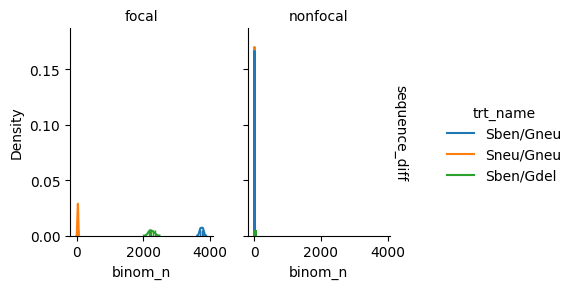

In [18]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    display(HTML(f"<h3>{min_leaves=}</h3>"))
    with tp.teed(
        sns.displot,
        data=grp[
            (grp["tb_stat"] == "num_leaves")
            & (grp["screen_name"] == "sequence_diff")
        ],
        x="binom_n",
        hue="trt_name",
        row="screen_name",
        col="mutation",
        common_norm=False,
        kind="kde",
        rug=True,
        # log_scale=True,
        aspect=0.75,
        height=3,
        facet_kws={"margin_titles": True},
    ) as teed:
        teed.set_titles(
            row_template="{row_name}",
            col_template="{col_name}",
        )
        teed.tight_layout()
    break


teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=mut-nobs+ext=.pdf
teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=mut-nobs+ext=.png


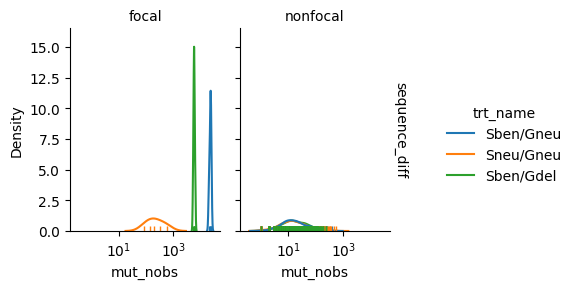

In [19]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    display(HTML(f"<h3>{min_leaves=}</h3>"))
    with tp.teed(
        sns.displot,
        data=grp[
            (grp["tb_stat"] == "num_leaves")
            & (grp["screen_name"] == "sequence_diff")
        ],
        x="mut_nobs",
        hue="trt_name",
        row="screen_name",
        col="mutation",
        common_norm=False,
        kind="kde",
        rug=True,
        log_scale=True,
        aspect=0.75,
        height=3,
        facet_kws={"margin_titles": True},
    ) as teed:
        teed.set_titles(
            row_template="{row_name}",
            col_template="{col_name}",
        )
        teed.tight_layout()
    break


teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=screened-nanmean+ext=.pdf
teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=screened-nanmean+ext=.png


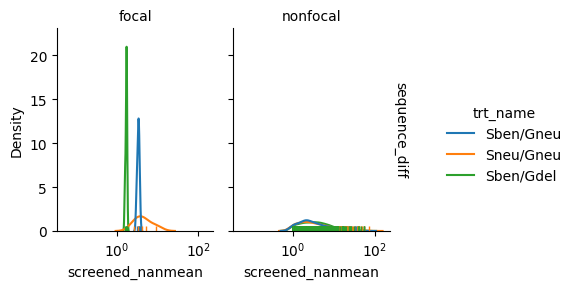

In [20]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    display(HTML(f"<h3>{min_leaves=}</h3>"))
    with tp.teed(
        sns.displot,
        data=grp[
            (grp["tb_stat"] == "num_leaves")
            & (grp["screen_name"] == "sequence_diff")
        ],
        x="screened_nanmean",
        hue="trt_name",
        row="screen_name",
        col="mutation",
        common_norm=False,
        kind="kde",
        rug=True,
        log_scale=True,
        aspect=0.75,
        height=3,
        facet_kws={"margin_titles": True},
    ) as teed:
        teed.set_titles(
            row_template="{row_name}",
            col_template="{col_name}",
        )
        teed.tight_layout()
    break


teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=screened-nanmax+ext=.pdf
teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=screened-nanmax+ext=.png


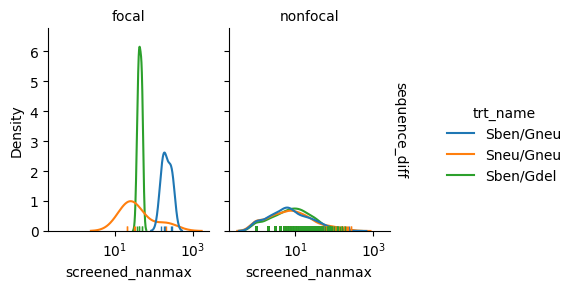

In [21]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    display(HTML(f"<h3>{min_leaves=}</h3>"))
    with tp.teed(
        sns.displot,
        data=grp[
            (grp["tb_stat"] == "num_leaves")
            & (grp["screen_name"] == "sequence_diff")
        ],
        x="screened_nanmax",
        hue="trt_name",
        row="screen_name",
        col="mutation",
        common_norm=False,
        kind="kde",
        rug=True,
        log_scale=True,
        aspect=0.75,
        height=3,
        facet_kws={"margin_titles": True},
    ) as teed:
        teed.set_titles(
            row_template="{row_name}",
            col_template="{col_name}",
        )
        teed.tight_layout()
    break


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:227: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  teed = plotter(*args, **{k: v for k, v in kwargs.items()})


teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=beq-nanmax+ext=.pdf
teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=beq-nanmax+ext=.png


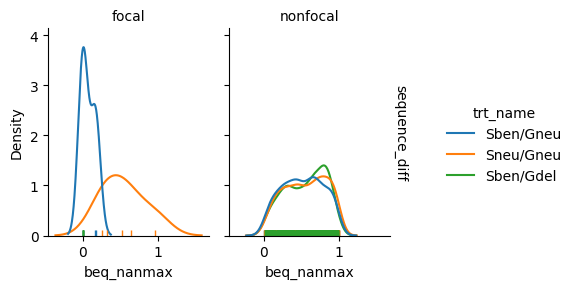

In [22]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    display(HTML(f"<h3>{min_leaves=}</h3>"))
    with tp.teed(
        sns.displot,
        data=grp[
            (grp["tb_stat"] == "num_leaves")
            & (grp["screen_name"] == "sequence_diff")
        ],
        x="beq_nanmax",
        hue="trt_name",
        row="screen_name",
        col="mutation",
        common_norm=False,
        kind="kde",
        rug=True,
        aspect=0.75,
        height=3,
        facet_kws={"margin_titles": True},
    ) as teed:
        teed.set_titles(
            row_template="{row_name}",
            col_template="{col_name}",
        )
        teed.tight_layout()
    break


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:227: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  teed = plotter(*args, **{k: v for k, v in kwargs.items()})


teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=beq-nanmean+ext=.pdf
teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=beq-nanmean+ext=.png


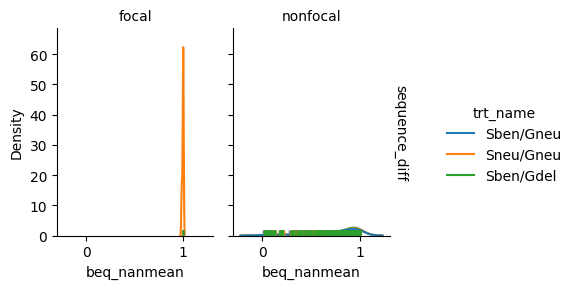

In [23]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    display(HTML(f"<h3>{min_leaves=}</h3>"))
    with tp.teed(
        sns.displot,
        data=grp[
            (grp["tb_stat"] == "num_leaves")
            & (grp["screen_name"] == "sequence_diff")
        ],
        x="beq_nanmean",
        hue="trt_name",
        row="screen_name",
        col="mutation",
        common_norm=False,
        kind="kde",
        rug=True,
        aspect=0.75,
        height=3,
        facet_kws={"margin_titles": True},
    ) as teed:
        teed.set_titles(
            row_template="{row_name}",
            col_template="{col_name}",
        )
        teed.tight_layout()
    break


teeplots/col=trt-name+hue=mutation+kind=kde+row=screen-name+viz=displot+x=screened-nanmean+ext=.pdf
teeplots/col=trt-name+hue=mutation+kind=kde+row=screen-name+viz=displot+x=screened-nanmean+ext=.png


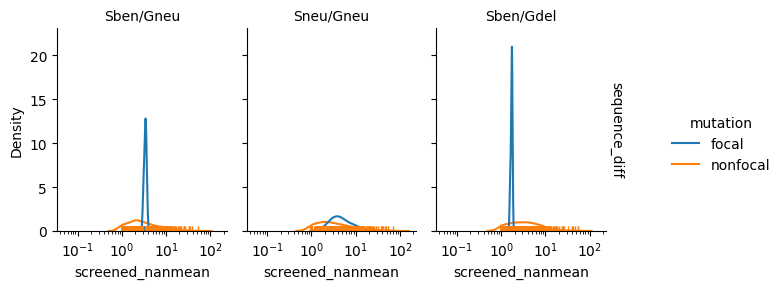

In [24]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    display(HTML(f"<h3>{min_leaves=}</h3>"))
    with tp.teed(
        sns.displot,
        data=grp[
            (grp["tb_stat"] == "num_leaves")
            & (grp["screen_name"] == "sequence_diff")
        ],
        x="screened_nanmean",
        hue="mutation",
        row="screen_name",
        col="trt_name",
        common_norm=False,
        kind="kde",
        rug=True,
        log_scale=True,
        aspect=0.75,
        height=3,
        facet_kws={"margin_titles": True},
    ) as teed:
        teed.set_titles(
            row_template="{row_name}",
            col_template="{col_name}",
        )
        teed.tight_layout()
    break


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:227: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  teed = plotter(*args, **{k: v for k, v in kwargs.items()})


teeplots/col=trt-name+hue=mutation+kind=kde+row=screen-name+viz=displot+x=screened-nanmedian+ext=.pdf
teeplots/col=trt-name+hue=mutation+kind=kde+row=screen-name+viz=displot+x=screened-nanmedian+ext=.png


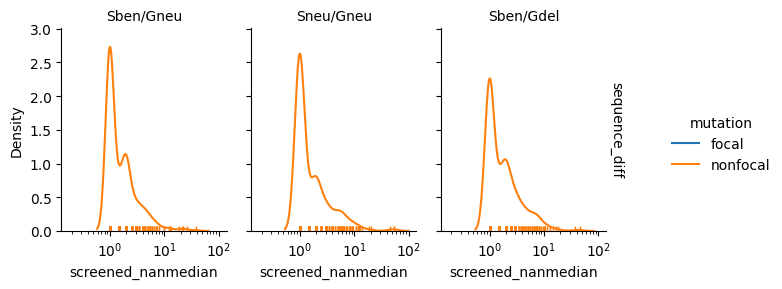

In [25]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    display(HTML(f"<h3>{min_leaves=}</h3>"))
    with tp.teed(
        sns.displot,
        data=grp[
            (grp["tb_stat"] == "num_leaves")
            & (grp["screen_name"] == "sequence_diff")
        ],
        x="screened_nanmedian",
        hue="mutation",
        row="screen_name",
        col="trt_name",
        common_norm=False,
        kind="kde",
        rug=True,
        log_scale=True,
        aspect=0.75,
        height=3,
        facet_kws={"margin_titles": True},
    ) as teed:
        teed.set_titles(
            row_template="{row_name}",
            col_template="{col_name}",
        )
        teed.tight_layout()
    break


teeplots/col=trt-name+hue=mutation+kind=box+row=screen-name+viz=catplot+y=screened-frac0+ext=.pdf
teeplots/col=trt-name+hue=mutation+kind=box+row=screen-name+viz=catplot+y=screened-frac0+ext=.png


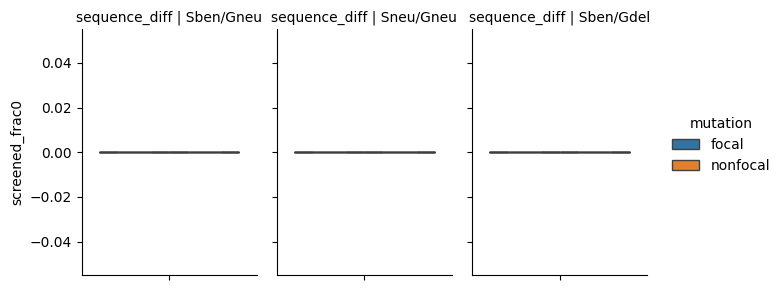

teeplots/col=trt-name+hue=mutation+kind=box+row=screen-name+viz=catplot+y=screened-frac1+ext=.pdf
teeplots/col=trt-name+hue=mutation+kind=box+row=screen-name+viz=catplot+y=screened-frac1+ext=.png


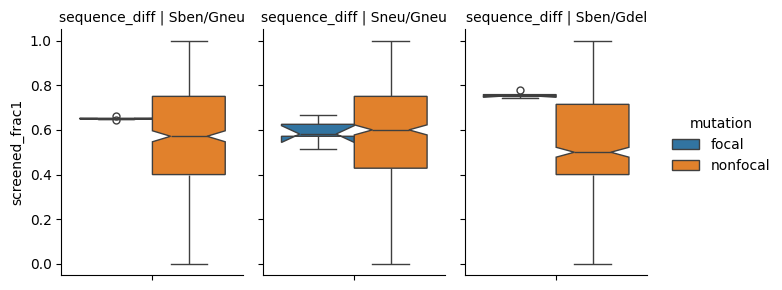

teeplots/col=trt-name+hue=mutation+kind=box+row=screen-name+viz=catplot+y=screened-frac2+ext=.pdf
teeplots/col=trt-name+hue=mutation+kind=box+row=screen-name+viz=catplot+y=screened-frac2+ext=.png


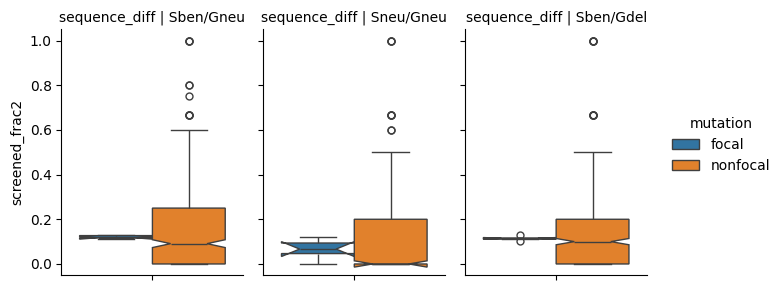

teeplots/col=trt-name+hue=mutation+kind=box+row=screen-name+viz=catplot+y=screened-frac3+ext=.pdf
teeplots/col=trt-name+hue=mutation+kind=box+row=screen-name+viz=catplot+y=screened-frac3+ext=.png


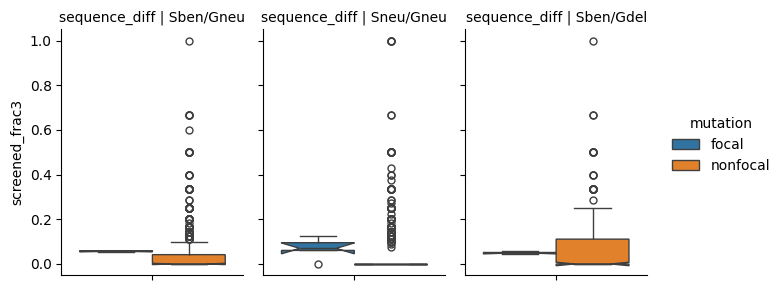

In [26]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    for n in range(4):
        display(HTML(f"<h3>{min_leaves=} {n=}</h3>"))
        with tp.teed(
            sns.catplot,
            data=grp[
                (grp["tb_stat"] == "num_leaves")
                & (grp["screen_name"] == "sequence_diff")
            ],
            y=f"screened_frac{n}",
            hue="mutation",
            row="screen_name",
            col="trt_name",
            kind="box",
            notch=True,
            aspect=0.75,
            height=3,
        ) as teed:
            teed.set_titles(
                row_template="{row_name}",
                col_template="{col_name}",
            )
            teed.tight_layout()
    break


In [27]:
df.loc[
    (df["trt_name"] == "Sben/Gneu")
    & (df["mut_char_pos"] == 0)
    & (df["tb_stat"].str.endswith("ratio")),
    [
        "mut_nobs",
        "mut_freq",
        "binom_n",
        "binom_k",
        "binom_p",
        "mw_p_dropna",
        "tb_stat",
        "screened_N",
        "trt_name",
        "mut_char_pos",
        "screened_nanmean",
    ],
].sample(25)


mut_nobs  mut_freq  binom_n  binom_k       binom_p   mw_p_dropna  \
1107677     19947  0.234845      519      257  8.606451e-01  6.189988e-01   
201636      22430  0.264480     3772     2814  0.000000e+00  0.000000e+00   
201694      22430  0.264480     1555      789  5.769258e-01  2.914445e-01   
8           24156  0.284101     3841     2906  0.000000e+00  0.000000e+00   
302343      22100  0.260595      587      292  9.342195e-01  9.151089e-01   
1007167     23378  0.275544      596      342  3.576173e-04  8.145591e-05   
201658      22430  0.264480     1731      869  8.853381e-01  7.773443e-01   
46          24156  0.284101     1499      745  8.363090e-01  9.669479e-01   
201630      22430  0.264480     1616     1349  0.000000e+00  0.000000e+00   
201675      22430  0.264480      497      262  2.434813e-01  1.897053e-01   
201695      22430  0.264480      536      269  9.655527e-01  5.744681e-01   
1107638     19947  0.234845     1502      740  5.879320e-01  9.868034e-01   
12          24156  0.284101     1706      831  2.978422e-01  2.965440e-01   
1007195     23378  0.275544     2873     1332  1.035347e-04  1.457997e-03   
1007190     23378  0.275544     5186     2500  1.019394e-02  1.556871e-01   
1107647     19947  0.234845     1199      585  4.187407e-01  5.496468e-02   
302362      22100  0.260595     3771     1949  4.017162e-02  3.384065e-08   
201687      22430  0.264480     1352      541  2.138116e-13  7.357846e-17   
201652      22430  0.264480     4333     2379  1.146111e-10  8.231134e-01   
1107669     19947  0.234845     1258      460  1.187386e-21  6.763203e-26   
1107650     19947  0.234845     6527     3940  0.000000e+00  1.944694e-35   
201650      22430  0.264480     6526     3952  0.000000e+00  2.031702e-28   
1107635     19947  0.234845      773      387  1.000000e+00  7.912945e-01   
1107617     19947  0.234845      761      602  0.000000e+00  0.000000e+00   
201680      22430  0.264480     3698     1873  4.395951e-01  3.594932e-08   

                      tb_stat  screened_N   trt_name  mut_char_pos  \
1107677      clade size ratio         544  Sben/Gneu             0   
201636   clade duration ratio        3819  Sben/Gneu             0   
201694       clade size ratio        1745  Sben/Gneu             0   
8        clade duration ratio        3922  Sben/Gneu             0   
302343   clade duration ratio         604  Sben/Gneu             0   
1007167      clade fblr ratio         596  Sben/Gneu             0   
201658       clade fblr ratio        1745  Sben/Gneu             0   
46         clade growth ratio        1505  Sben/Gneu             0   
201630   clade duration ratio        1633  Sben/Gneu             0   
201675     clade growth ratio         497  Sben/Gneu             0   
201695       clade size ratio         578  Sben/Gneu             0   
1107638      clade fblr ratio        1508  Sben/Gneu             0   
12       clade duration ratio        1759  Sben/Gneu             0   
1007195      clade size ratio        2999  Sben/Gneu             0   
1007190      clade size ratio        6615  Sben/Gneu             0   
1107647    clade growth ratio        1200  Sben/Gneu             0   
302362       clade fblr ratio        3779  Sben/Gneu             0   
201687       clade size ratio        1474  Sben/Gneu             0   
201652       clade fblr ratio        4338  Sben/Gneu             0   
1107669      clade size ratio        1378  Sben/Gneu             0   
1107650    clade growth ratio        6542  Sben/Gneu             0   
201650       clade fblr ratio        6539  Sben/Gneu             0   
1107635      clade fblr ratio         774  Sben/Gneu             0   
1107617  clade duration ratio         774  Sben/Gneu             0   
201680     clade growth ratio        3702  Sben/Gneu             0   

         screened_nanmean  
1107677          0.061215  
201636                NaN  
201694           0.059637  
8                     inf  
302343          -0.004610  
1007167          

In [28]:
df.loc[
    (df["trt_name"] == "Sben/Gneu")
    & (df["mut_char_pos"] == 0)
    & (df["tb_stat"].str.endswith("ratio")),
    [
        "mut_nobs",
        "mut_freq",
        "binom_n",
        "binom_k",
        "binom_p",
        "mw_p_dropna",
        "tb_stat",
        "screened_N",
        "trt_name",
        "mut_char_pos",
        "screened_nanmean",
    ],
].sample(25)


mut_nobs  mut_freq  binom_n  binom_k   binom_p   mw_p_dropna  \
1007180     23378  0.275544     1773      856  0.154154  1.133359e-01   
201629      22430  0.264480     1277      954  0.000000  0.000000e+00   
1107646     19947  0.234845     2168     1013  0.002452  5.265157e-03   
1107651     19947  0.234845     1377      688  1.000000  1.465044e-01   
302361      22100  0.260595      603      318  0.192484  6.324033e-01   
1           24156  0.284101     1306      974  0.000000  0.000000e+00   
1107626     19947  0.234845     3611     3316  0.000000  0.000000e+00   
201694      22430  0.264480     1555      789  0.576926  2.914445e-01   
50          24156  0.284101     3738     1923  0.080086  3.640300e-07   
1107654     19947  0.234845     3874     2014  0.013954  4.961297e-05   
302359      22100  0.260595      494      262  0.191918  2.753487e-01   
1007162     23378  0.275544     1771      856  0.168117  2.660990e-01   
302373      22100  0.260595      884      486  0.003409  1.340138e-01   
60          24156  0.284101     3162     1107  0.000000  3.455389e-23   
201649      22430  0.264480      793      408  0.434679  2.777018e-01   
201636      22430  0.264480     3772     2814  0.000000  0.000000e+00   
1007160     23378  0.275544     1597      792  0.763973  9.770784e-01   
1007147     23378  0.275544      583      498  0.000000  0.000000e+00   
26          24156  0.284101     3919     2090  0.000033  1.196424e-03   
302380      22100  0.260595     3771     1949  0.040172  3.043241e-06   
201667      22430  0.264480      793      408  0.434679  3.060377e-01   
7           24156  0.284101      851      653  0.000000  0.000000e+00   
65          24156  0.284101      471      241  0.645006  4.438445e-01   
29          24156  0.284101      500      251  0.964335  8.604447e-01   
1007167     23378  0.275544      596      342  0.000358  8.145591e-05   

                      tb_stat  screened_N   trt_name  mut_char_pos  \
1007180    clade growth ratio        1782  Sben/Gneu             0   
201629   clade duration ratio        1292  Sben/Gneu             0   
1107646    clade growth ratio        2172  Sben/Gneu             0   
1107651    clade growth ratio        1378  Sben/Gneu             0   
302361       clade fblr ratio         604  Sben/Gneu             0   
1        clade duration ratio        1331  Sben/Gneu             0   
1107626  clade duration ratio        3706  Sben/Gneu             0   
201694       clade size ratio        1745  Sben/Gneu             0   
50         clade growth ratio        3748  Sben/Gneu             0   
1107654    clade growth ratio        3879  Sben/Gneu             0   
302359       clade fblr ratio         495  Sben/Gneu             0   
1007162      clade fblr ratio        1782  Sben/Gneu             0   
302373     clade growth ratio         884  Sben/Gneu             0   
60           clade size ratio        4399  Sben/Gneu             0   
201649       clade fblr ratio         795  Sben/Gneu             0   
201636   clade duration ratio        3819  Sben/Gneu             0   
1007160      clade fblr ratio        1611  Sben/Gneu             0   
1007147  clade duration ratio         596  Sben/Gneu             0   
26           clade fblr ratio        3922  Sben/Gneu             0   
302380     clade growth ratio        3779  Sben/Gneu             0   
201667     clade growth ratio         795  Sben/Gneu             0   
7        clade duration ratio         872  Sben/Gneu             0   
65           clade size ratio         501  Sben/Gneu             0   
29           clade fblr ratio         501  Sben/Gneu             0   
1007167      clade fblr ratio         596  Sben/Gneu             0   

         screened_nanmean  
1007180         -0.005241  
201629           0.371522  
1107646         -0.001737  
1107651         -0.006351  
302361           0.001452  
1                0.354982  
1107626               inf  
201694           0.059637  
50              -0.002326  
1107654  

In [29]:
df.loc[
    (df["trt_name"] == "Sneu/Gneu")
    & (df["mut_char_pos"] == 0)
    & (df["tb_stat"].str.endswith("ratio")),
    [
        "mut_nobs",
        "mut_freq",
        "binom_n",
        "binom_k",
        "binom_p",
        "mw_p_dropna",
        "tb_stat",
        "screened_N",
        "trt_name",
        "mut_char_pos",
        "screened_nanmean",
    ],
].sample(25)


mut_nobs  mut_freq  binom_n  binom_k   binom_p   mw_p_dropna  \
604460        88  0.001040       19       13  0.167068  4.578460e-01   
705159       146  0.001727        7        3  1.000000  5.494962e-01   
705164       146  0.001727       70       22  0.002548  1.532494e-04   
100882       323  0.003827       23        9  0.404873  5.979577e-01   
100833       323  0.003827       21        9  0.663624  2.793413e-01   
402696       587  0.006945       25       16  0.229523  3.466304e-01   
604457        88  0.001040        4        3  0.625000  1.268226e-01   
705208       146  0.001727       17        5  0.143463  4.948185e-01   
100830       323  0.003827       42       34  0.000069  7.992756e-04   
402756       587  0.006945       31       13  0.473130  4.594138e-01   
604492        88  0.001040        6        5  0.218750  2.677606e-01   
402755       587  0.006945       12        5  0.774414  4.063533e-01   
503539       197  0.002329        3        3  0.250000  2.830962e-01   
100838       323  0.003827       49       29  0.252870  5.318380e-01   
402739       587  0.006945       11        4  0.548828  5.843112e-01   
100850       323  0.003827       34       16  0.864166  6.286179e-01   
503514       197  0.002329       44       31  0.009560  1.355829e-03   
100868       323  0.003827       31       10  0.070756  2.335004e-01   
402729       587  0.006945        8        4  1.000000  8.383442e-01   
100859       323  0.003827       83       35  0.187460  3.684525e-02   
503510       197  0.002329       18       12  0.237885  1.734755e-01   
503577       197  0.002329        6        5  0.218750  1.003192e-01   
503556       197  0.002329       21       13  0.383310  7.622985e-01   
402717       587  0.006945       10        3  0.343750  3.163585e-01   
705183       146  0.001727       59       13  0.000019  4.685731e-11   

                     tb_stat  screened_N   trt_name  mut_char_pos  \
604460      clade fblr ratio          19  Sneu/Gneu             0   
705159      clade fblr ratio           7  Sneu/Gneu             0   
705164      clade fblr ratio          70  Sneu/Gneu             0   
100882      clade size ratio          43  Sneu/Gneu             0   
100833      clade fblr ratio          21  Sneu/Gneu             0   
402696  clade duration ratio          25  Sneu/Gneu             0   
604457      clade fblr ratio           4  Sneu/Gneu             0   
705208      clade size ratio          32  Sneu/Gneu             0   
100830  clade duration ratio          43  Sneu/Gneu             0   
402756      clade size ratio          39  Sneu/Gneu             0   
604492      clade size ratio           6  Sneu/Gneu             0   
402755      clade size ratio          15  Sneu/Gneu             0   
503539      clade fblr ratio           3  Sneu/Gneu             0   
100838      clade fblr ratio          49  Sneu/Gneu             0   
402739    clade growth ratio          11  Sneu/Gneu             0   
100850    clade growth ratio          34  Sneu/Gneu             0   
503514  clade duration ratio          45  Sneu/Gneu             0   
100868      clade size ratio          34  Sneu/Gneu             0   
402729      clade fblr ratio           8  Sneu/Gneu             0   
100859    clade growth ratio          83  Sneu/Gneu             0   
503510  clade duration ratio          18  Sneu/Gneu             0   
503577      clade size ratio           6  Sneu/Gneu             0   
503556    clade growth ratio          21  Sneu/Gneu             0   
402717      clade fblr ratio          10  Sneu/Gneu             0   
705183    clade growth ratio          59  Sneu/Gneu             0   

        screened_nanmean  
604460          0.005073  
705159         -0.004935  
705164         -0.018430  
100882         -0.118093  
100833         -0.006256  
402696               inf  
604457          0.024657  
705208         -0.149295  
100830               inf  
402756         -0.114361  
604492          0.646875  
402755         -